<a href="https://colab.research.google.com/github/Hattiomkar/Omkar.Hatti/blob/master/Atruringfan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cleanup

# Importing & installing libraries

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path1="/content/drive/MyDrive/Colab Notebooks/Surveydata_train.csv"

In [ ]:
path2="/content/drive/MyDrive/Colab Notebooks/Traveldata_train.csv"

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


In [ ]:
# Set display options to prevent line wrapping
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping

In [ ]:
surveyog = pd.read_csv(path1)
travelog = pd.read_csv(path2)

# Merging Train set --? o/p is df --> which is a df with Overall ex as boolean

In [ ]:
print(surveyog.head(5))
print(surveyog.shape)
print(surveyog.describe())
print("Missing values per column:")
print(surveyog.isnull().sum())
for column in surveyog.columns:
    dup_vals = surveyog[column][surveyog[column].duplicated()].unique()
    if dup_vals.size > 0:
        print(f"Duplicate values in '{column}': {dup_vals}")

         ID  Overall_Experience       Seat_Comfort Seat_Class Arrival_Time_Convenient           Catering  Platform_Location Onboard_Wifi_Service Onboard_Entertainment Online_Support Ease_of_Online_Booking    Onboard_Service            Legroom   Baggage_Handling    CheckIn_Service        Cleanliness Online_Boarding
0  98800001                   0  Needs Improvement  Green Car               Excellent          Excellent    Very Convenient                 Good     Needs Improvement     Acceptable      Needs Improvement  Needs Improvement         Acceptable  Needs Improvement               Good  Needs Improvement            Poor
1  98800002                   0               Poor   Ordinary               Excellent               Poor  Needs Improvement                 Good                  Poor           Good                   Good          Excellent  Needs Improvement               Poor  Needs Improvement               Good            Good
2  98800003                   1  Needs Improvement  

*The above is mostly categorical*

In [ ]:
print(travelog.head(5))
print(travelog.shape)
print(travelog.describe())
print("Missing values per column:")
print(travelog.isnull().sum())
for column in travelog.columns:
    dup_vals = travelog[column][travelog[column].duplicated()].unique()
    if dup_vals.size > 0:
        print(f"Duplicate values in '{column}': {dup_vals}")

         ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins
0  98800001  Female  Loyal Customer  52.0              NaN     Business              272                      0.0                    5.0
1  98800002    Male  Loyal Customer  48.0  Personal Travel          Eco             2200                      9.0                    0.0
2  98800003  Female  Loyal Customer  43.0  Business Travel     Business             1061                     77.0                  119.0
3  98800004  Female  Loyal Customer  44.0  Business Travel     Business              780                     13.0                   18.0
4  98800005  Female  Loyal Customer  50.0  Business Travel     Business             1981                      0.0                    0.0
(94379, 9)
                 ID           Age  Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins
count  9.437900e+04  94346.000000     94379.000000             94322

*The above is mostly numerical*

ID seems to be the same # of rows and no duplicates so left joining the dataset

In [ ]:
merged = surveyog.merge(travelog, how='outer', on='ID')
print(merged.shape)
print(merged.describe())



(94379, 25)
                 ID  Overall_Experience           Age  Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins
count  9.437900e+04        94379.000000  94346.000000     94379.000000             94322.000000           94022.000000
mean   9.884719e+07            0.546658     39.419647      1978.888185                14.647092              15.005222
std    2.724501e+04            0.497821     15.116632      1027.961019                38.138781              38.439409
min    9.880000e+07            0.000000      7.000000        50.000000                 0.000000               0.000000
25%    9.882360e+07            0.000000     27.000000      1359.000000                 0.000000               0.000000
50%    9.884719e+07            1.000000     40.000000      1923.000000                 0.000000               0.000000
75%    9.887078e+07            1.000000     51.000000      2538.000000                12.000000              13.000000
max    9.889438e+07            1.000

In [ ]:
print("Missing values per column:")
print(merged.isnull().sum())

Missing values per column:
ID                            0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64


In [ ]:
for column in merged.columns:
    dup_vals = merged[column][merged[column].duplicated()].unique()
    if dup_vals.size > 0:
        print(f"Duplicate values in '{column}': {dup_vals}")

Duplicate values in 'Overall_Experience': [0 1]
Duplicate values in 'Seat_Comfort': ['Needs Improvement' 'Acceptable' 'Good' 'Excellent' 'Extremely Poor'
 'Poor' nan]
Duplicate values in 'Seat_Class': ['Green Car' 'Ordinary']
Duplicate values in 'Arrival_Time_Convenient': ['Excellent' 'Needs Improvement' 'Good' 'Acceptable' nan 'Extremely Poor'
 'Poor']
Duplicate values in 'Catering': ['Acceptable' 'Needs Improvement' 'Good' 'Excellent' 'Poor' nan
 'Extremely Poor']
Duplicate values in 'Platform_Location': ['Needs Improvement' 'Inconvenient' 'Manageable' 'Very Convenient'
 'Convenient' nan 'Very Inconvenient']
Duplicate values in 'Onboard_Wifi_Service': ['Good' 'Needs Improvement' 'Acceptable' 'Excellent' 'Poor'
 'Extremely Poor' nan]
Duplicate values in 'Onboard_Entertainment': ['Needs Improvement' 'Good' 'Excellent' 'Acceptable' 'Poor'
 'Extremely Poor' nan]
Duplicate values in 'Online_Support': ['Acceptable' 'Excellent' 'Good' 'Needs Improvement' 'Poor' nan]
Duplicate values in 'Eas

In [ ]:
df = merged.copy()

In [ ]:
print(df.head(5))
print(df.shape)


         ID  Overall_Experience       Seat_Comfort Seat_Class Arrival_Time_Convenient           Catering  Platform_Location Onboard_Wifi_Service Onboard_Entertainment Online_Support Ease_of_Online_Booking    Onboard_Service            Legroom   Baggage_Handling    CheckIn_Service        Cleanliness Online_Boarding  Gender   Customer_Type   Age      Type_Travel Travel_Class  Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins
0  98800001                   0  Needs Improvement  Green Car               Excellent          Excellent    Very Convenient                 Good     Needs Improvement     Acceptable      Needs Improvement  Needs Improvement         Acceptable  Needs Improvement               Good  Needs Improvement            Poor  Female  Loyal Customer  52.0              NaN     Business              272                      0.0                    5.0
1  98800002                   0               Poor   Ordinary               Excellent               Poor  Needs Improv

In [ ]:
df['Overall_Experience'] = df['Overall_Experience'].astype(bool)

In [ ]:
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
num_cols = df.select_dtypes(include=['number']).columns.tolist()
df_cat = df[cat_cols]
df_num = df[num_cols]
print(df_cat.head(5))
print(df_num.head(5))

   Overall_Experience       Seat_Comfort Seat_Class Arrival_Time_Convenient           Catering  Platform_Location Onboard_Wifi_Service Onboard_Entertainment Online_Support Ease_of_Online_Booking    Onboard_Service            Legroom   Baggage_Handling    CheckIn_Service        Cleanliness Online_Boarding  Gender   Customer_Type      Type_Travel Travel_Class
0               False  Needs Improvement  Green Car               Excellent          Excellent    Very Convenient                 Good     Needs Improvement     Acceptable      Needs Improvement  Needs Improvement         Acceptable  Needs Improvement               Good  Needs Improvement            Poor  Female  Loyal Customer              NaN     Business
1               False               Poor   Ordinary               Excellent               Poor  Needs Improvement                 Good                  Poor           Good                   Good          Excellent  Needs Improvement               Poor  Needs Improvement          

In [ ]:
df_cat.shape

(94379, 20)

In [ ]:
unique_values = {col: df_cat[col].unique().tolist() for col in df_cat.columns}
import json

print(json.dumps(unique_values, indent=2, default=str))

{
  "Overall_Experience": [
    false,
    true
  ],
  "Seat_Comfort": [
    "Needs Improvement",
    "Poor",
    "Acceptable",
    "Good",
    "Excellent",
    "Extremely Poor",
    NaN
  ],
  "Seat_Class": [
    "Green Car",
    "Ordinary"
  ],
  "Arrival_Time_Convenient": [
    "Excellent",
    "Needs Improvement",
    "Acceptable",
    NaN,
    "Good",
    "Poor",
    "Extremely Poor"
  ],
  "Catering": [
    "Excellent",
    "Poor",
    "Needs Improvement",
    NaN,
    "Acceptable",
    "Good",
    "Extremely Poor"
  ],
  "Platform_Location": [
    "Very Convenient",
    "Needs Improvement",
    "Manageable",
    "Inconvenient",
    "Convenient",
    NaN,
    "Very Inconvenient"
  ],
  "Onboard_Wifi_Service": [
    "Good",
    "Needs Improvement",
    "Acceptable",
    "Excellent",
    "Poor",
    "Extremely Poor",
    NaN
  ],
  "Onboard_Entertainment": [
    "Needs Improvement",
    "Poor",
    "Good",
    "Excellent",
    "Acceptable",
    "Extremely Poor",
    NaN
  ],
  "Onl

# Dropping NaN df--> data ; Splitting df into num and cat and ID

 **Exploratory Data Analysis (EDA)
Univariate Analysis**

In [ ]:
data= df.dropna()

In [ ]:
data.head(5)

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
1,98800002,False,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,True,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
4,98800005,True,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0
5,98800006,True,Needs Improvement,Ordinary,Needs Improvement,Acceptable,Needs Improvement,Good,Excellent,Good,Acceptable,Acceptable,Good,Acceptable,Acceptable,Acceptable,Acceptable,Male,Loyal Customer,44.0,Business Travel,Business,2810,0.0,0.0
6,98800007,False,Good,Green Car,Excellent,Good,Inconvenient,Good,Good,Good,Good,Good,Excellent,Needs Improvement,Excellent,Acceptable,Good,Male,Loyal Customer,56.0,Personal Travel,Eco,2029,0.0,0.0


In [ ]:
# Explicitly assign ID column
id_col = ['ID']

# Identify categorical columns, excluding ID
cat_cols = data.select_dtypes(include=['object', 'category', 'bool']).columns.difference(id_col).tolist()

# Identify numerical columns, excluding ID
num_cols = data.select_dtypes(include='number').columns.difference(id_col).tolist()

# Create separate DataFrames
data_id  = data[id_col]
data_cat = data[cat_cols]
data_num = data[num_cols]

# Preview
print("ID Columns:", data_id.columns.tolist())
print("Categorical Columns:", data_cat.columns.tolist())
print("Numerical Columns:", data_num.columns.tolist())

# Optional: Check samples
print(data_id.head())
print(data_cat.head())
print(data_num.head())

ID Columns: ['ID']
Categorical Columns: ['Arrival_Time_Convenient', 'Baggage_Handling', 'Catering', 'CheckIn_Service', 'Cleanliness', 'Customer_Type', 'Ease_of_Online_Booking', 'Gender', 'Legroom', 'Onboard_Entertainment', 'Onboard_Service', 'Onboard_Wifi_Service', 'Online_Boarding', 'Online_Support', 'Overall_Experience', 'Platform_Location', 'Seat_Class', 'Seat_Comfort', 'Travel_Class', 'Type_Travel']
Numerical Columns: ['Age', 'Arrival_Delay_in_Mins', 'Departure_Delay_in_Mins', 'Travel_Distance']
         ID
1  98800002
2  98800003
4  98800005
5  98800006
6  98800007
  Arrival_Time_Convenient   Baggage_Handling           Catering    CheckIn_Service Cleanliness   Customer_Type Ease_of_Online_Booking  Gender            Legroom Onboard_Entertainment Onboard_Service Onboard_Wifi_Service Online_Boarding Online_Support  Overall_Experience  Platform_Location Seat_Class       Seat_Comfort Travel_Class      Type_Travel
1               Excellent               Poor               Poor  Needs Im

# Encoder

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Define column groups
ordinal_cols = [
    "Seat_Comfort", "Arrival_Time_Convenient", "Catering", "Platform_Location",
    "Onboard_Wifi_Service", "Onboard_Entertainment", "Online_Support",
    "Ease_of_Online_Booking", "Onboard_Service", "Legroom", "Baggage_Handling",
    "CheckIn_Service", "Cleanliness", "Online_Boarding"
]

nominal_binary_cols = [
    "Overall_Experience", "Seat_Class", "Gender", "Type_Travel", "Travel_Class", "Customer_Type"
]

# Define category orders for ordinal columns (based on your JSON)
ordinal_categories = [
    ["Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],  # Seat_Comfort
    ["Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],  # Arrival_Time_Convenient
    ["Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],  # Catering
    ["Very Inconvenient", "Inconvenient", "Needs Improvement", "Manageable", "Convenient", "Very Convenient"],  # Platform_Location
    ["Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],  # Onboard_Wifi_Service
    ["Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],  # Onboard_Entertainment
    ["Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],  # Online_Support
    ["Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],  # Ease_of_Online_Booking
    ["Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],  # Onboard_Service
    ["Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],  # Legroom
    ["Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],                    # Baggage_Handling
    ["Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],  # CheckIn_Service
    ["Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],  # Cleanliness
    ["Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],  # Online_Boarding
]

# Set up encoders
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)
onehot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Build the transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_encoder, ordinal_cols),
        ('ohe', onehot_encoder, nominal_binary_cols)
    ]
)

# Encoding & concatenating with dropped Nan

In [ ]:
df_cat_for_encoding = data[cat_cols].copy()        # for encoding
df_cat_with_id = data[id_col + cat_cols].copy()    # save for later merge

In [ ]:
df_cat_clean = df_cat_for_encoding.dropna()
df_num_clean = data.loc[df_cat_clean.index, num_cols].dropna()
df_id_clean = data.loc[df_cat_clean.index, id_col]

In [ ]:
X_encoded = preprocessor.fit_transform(df_cat_clean)
encoded_cols = preprocessor.get_feature_names_out()
df_encoded = pd.DataFrame(X_encoded, columns=encoded_cols, index=df_cat_clean.index)

In [ ]:
# This gives you an EDA-ready dataset
df_eda_ready = pd.concat([df_id_clean.reset_index(drop=True),
                          df_encoded.reset_index(drop=True),
                          df_num_clean.reset_index(drop=True)],
                         axis=1)

# Exp. Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None, title=None):
    """
    Boxplot and histogram combined

    data: DataFrame
    feature: column name (string)
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    title: optional title for the plot
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # Boxplot
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")

    # Histogram
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else \
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, palette="winter")

    # Mean and Median lines
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--", label='Mean')
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-", label='Median')
    ax_hist2.legend()

    # Title
    f2.suptitle(title if title else f"Distribution of {feature}", fontsize=16)

    plt.tight_layout()
    plt.show()

Comments on EDA:

1. None atm- we're using trees, ANN so lienarity won't be as much of a problem + most of the non-normal data is categorical



📊 Histogram & Boxplot for: ID


/tmp/ipython-input-26-3135423096.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else \


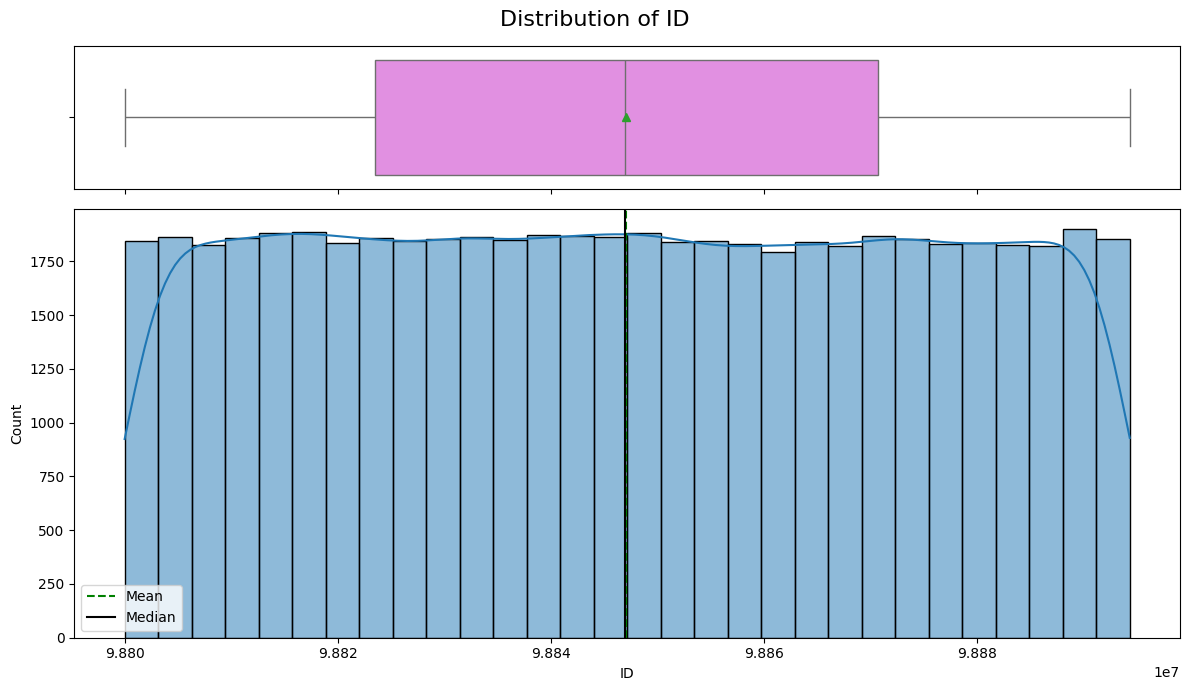


📊 Histogram & Boxplot for: ord__Seat_Comfort


/tmp/ipython-input-26-3135423096.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else \


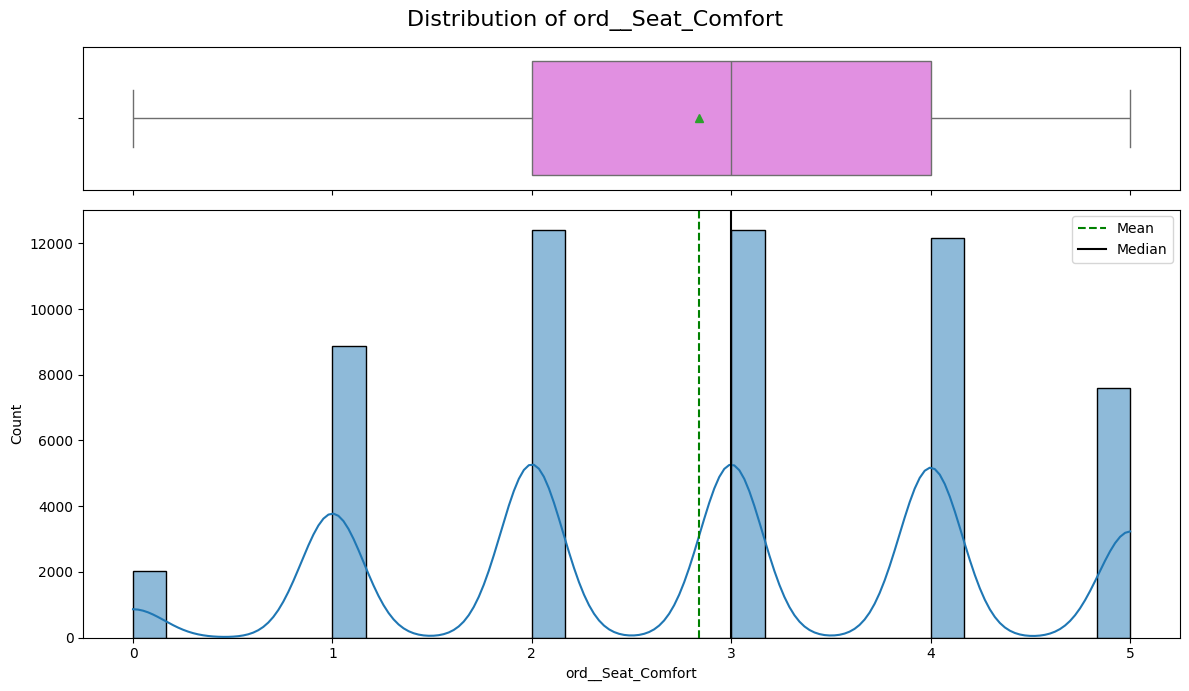


📊 Histogram & Boxplot for: ord__Arrival_Time_Convenient


/tmp/ipython-input-26-3135423096.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else \


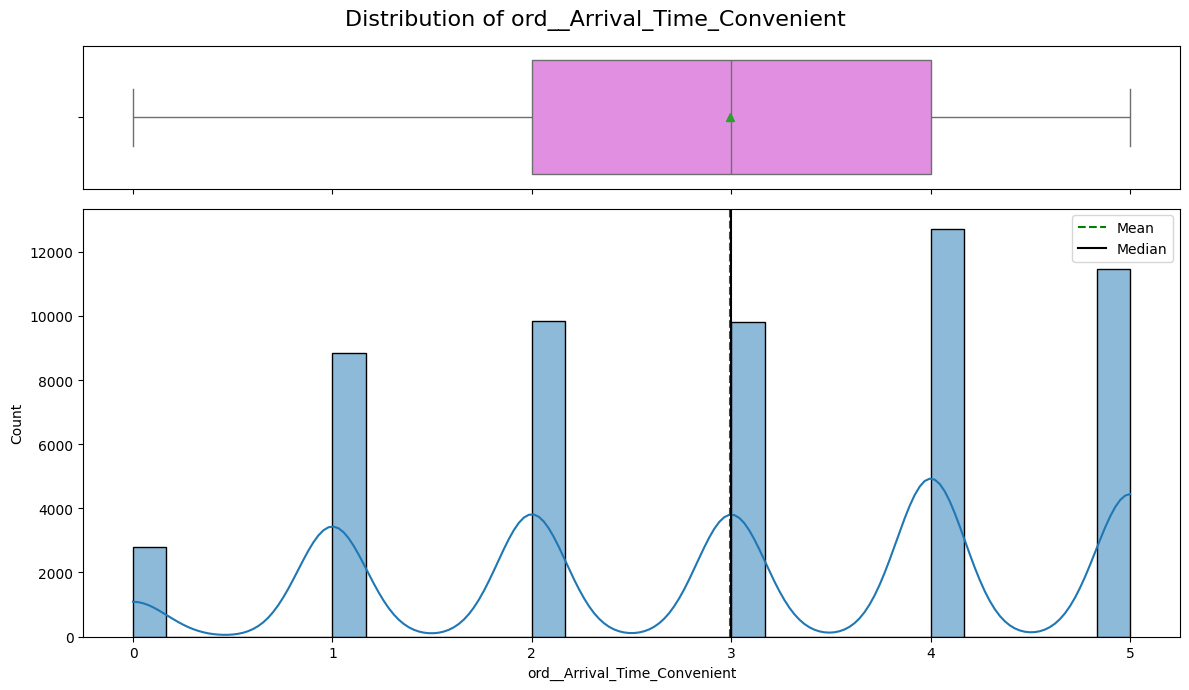


📊 Histogram & Boxplot for: ord__Catering


/tmp/ipython-input-26-3135423096.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else \


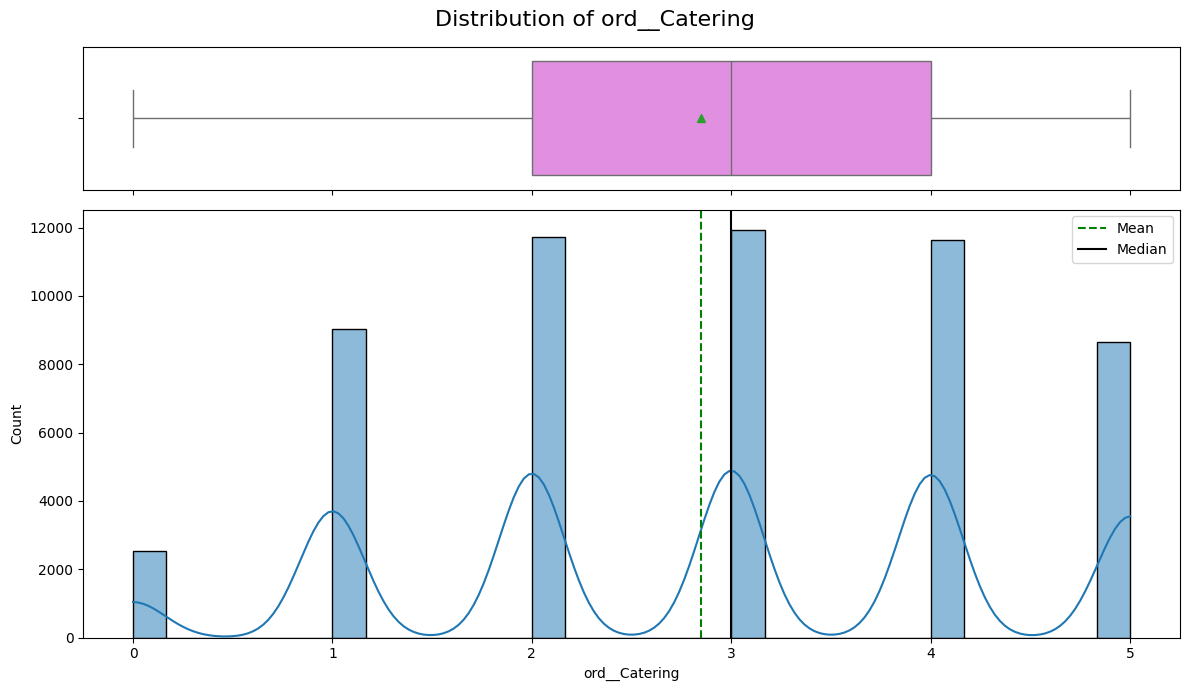


📊 Histogram & Boxplot for: ord__Platform_Location


/tmp/ipython-input-26-3135423096.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else \


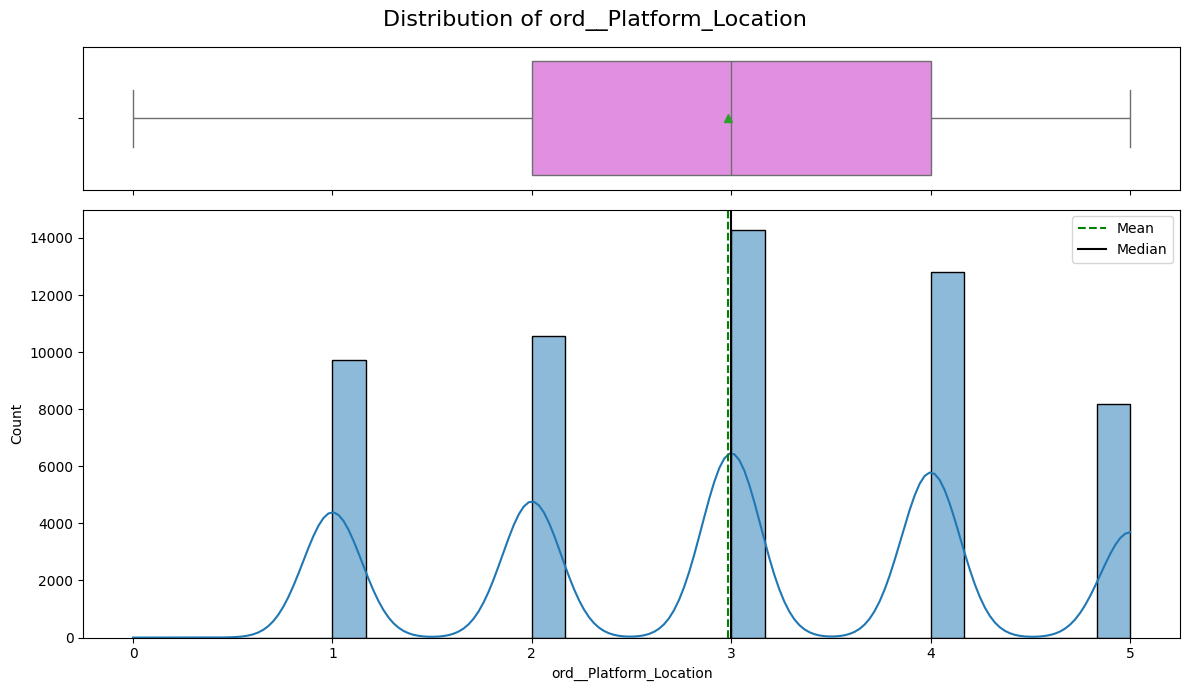


📊 Histogram & Boxplot for: ord__Onboard_Wifi_Service


/tmp/ipython-input-26-3135423096.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else \


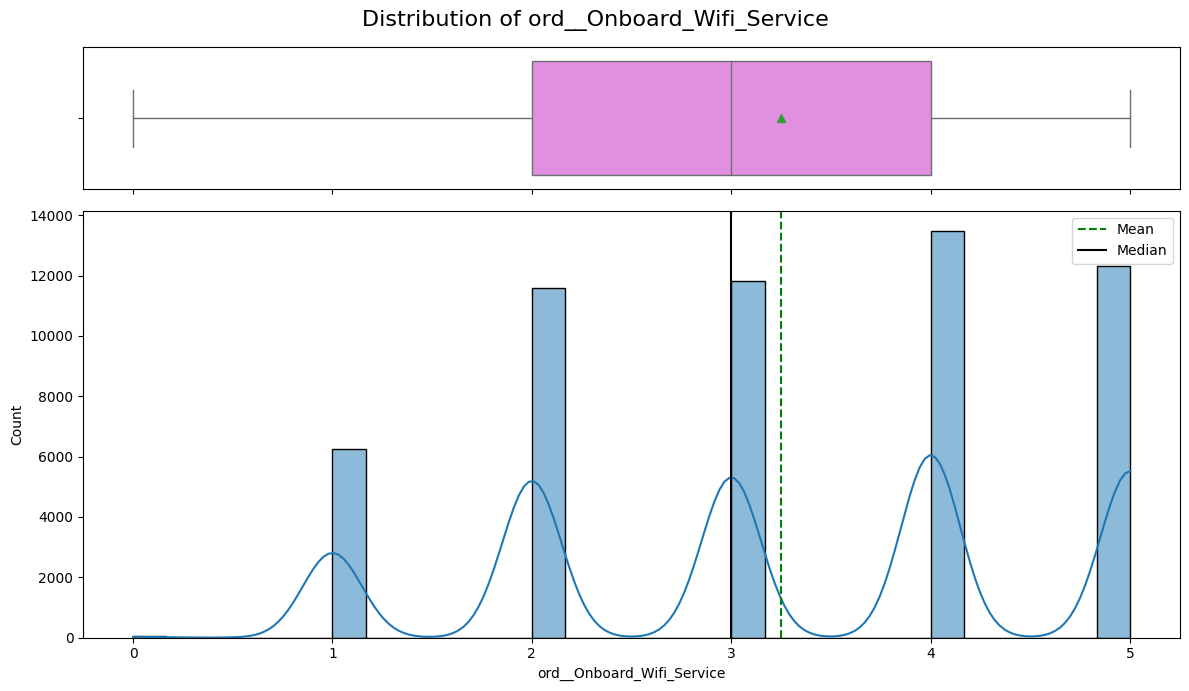


📊 Histogram & Boxplot for: ord__Onboard_Entertainment


/tmp/ipython-input-26-3135423096.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else \


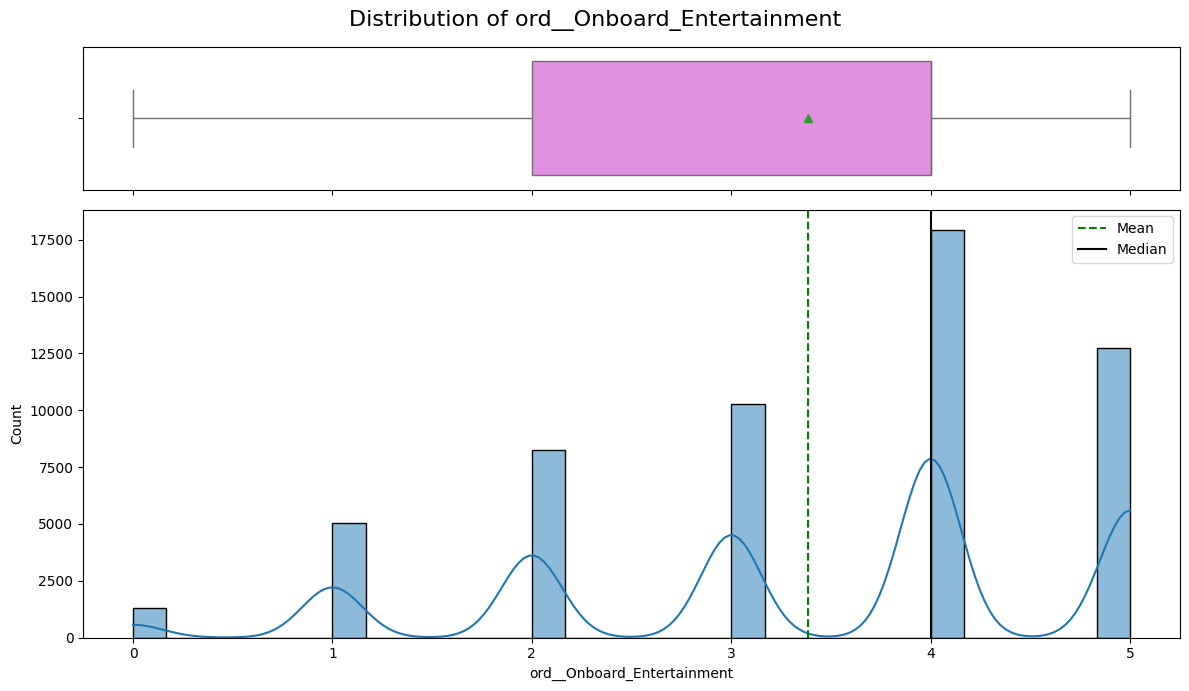


📊 Histogram & Boxplot for: ord__Online_Support


/tmp/ipython-input-26-3135423096.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else \


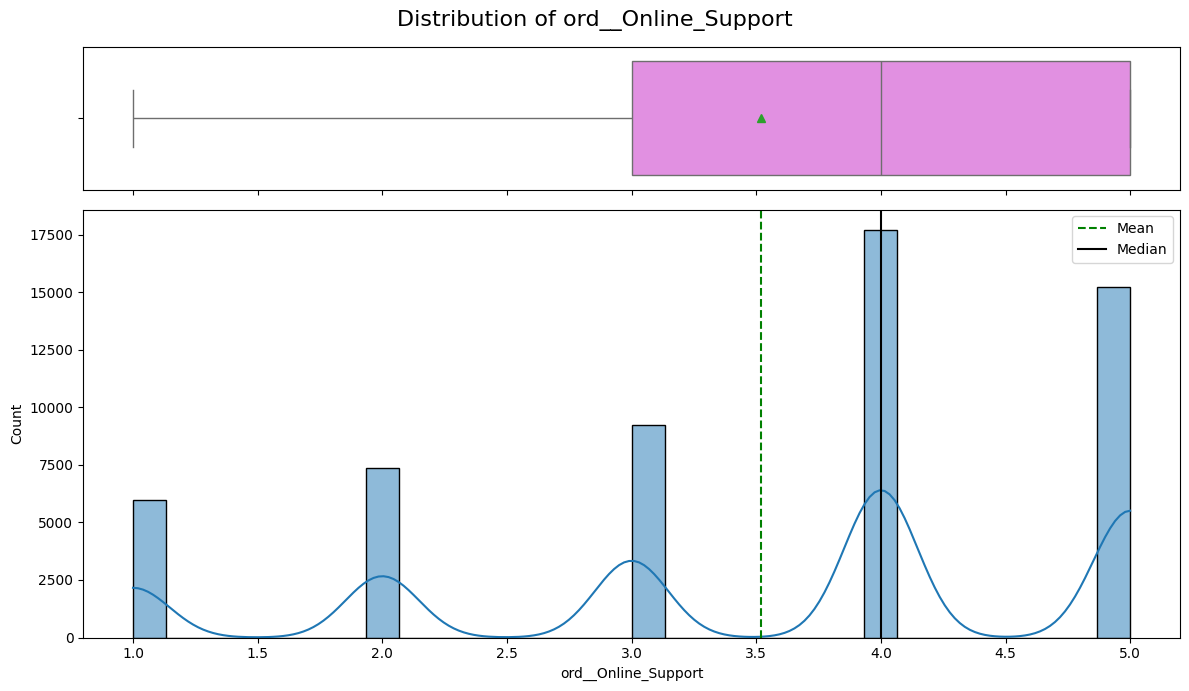


📊 Histogram & Boxplot for: ord__Ease_of_Online_Booking


/tmp/ipython-input-26-3135423096.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else \


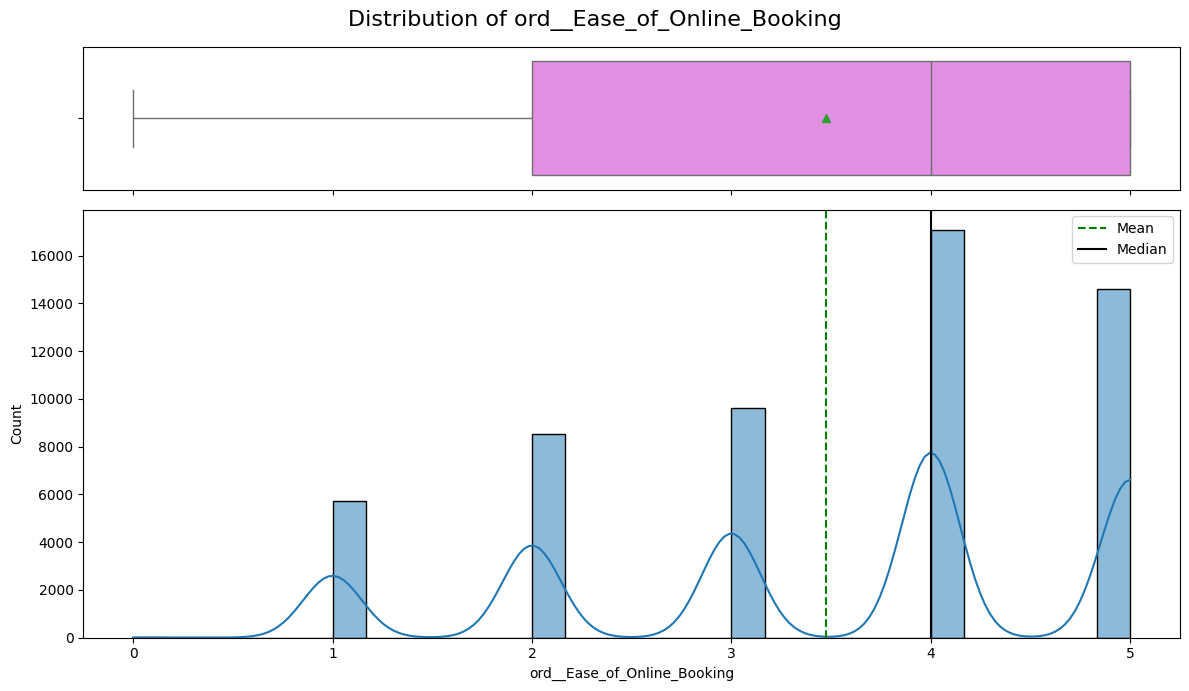


📊 Histogram & Boxplot for: ord__Onboard_Service


/tmp/ipython-input-26-3135423096.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else \


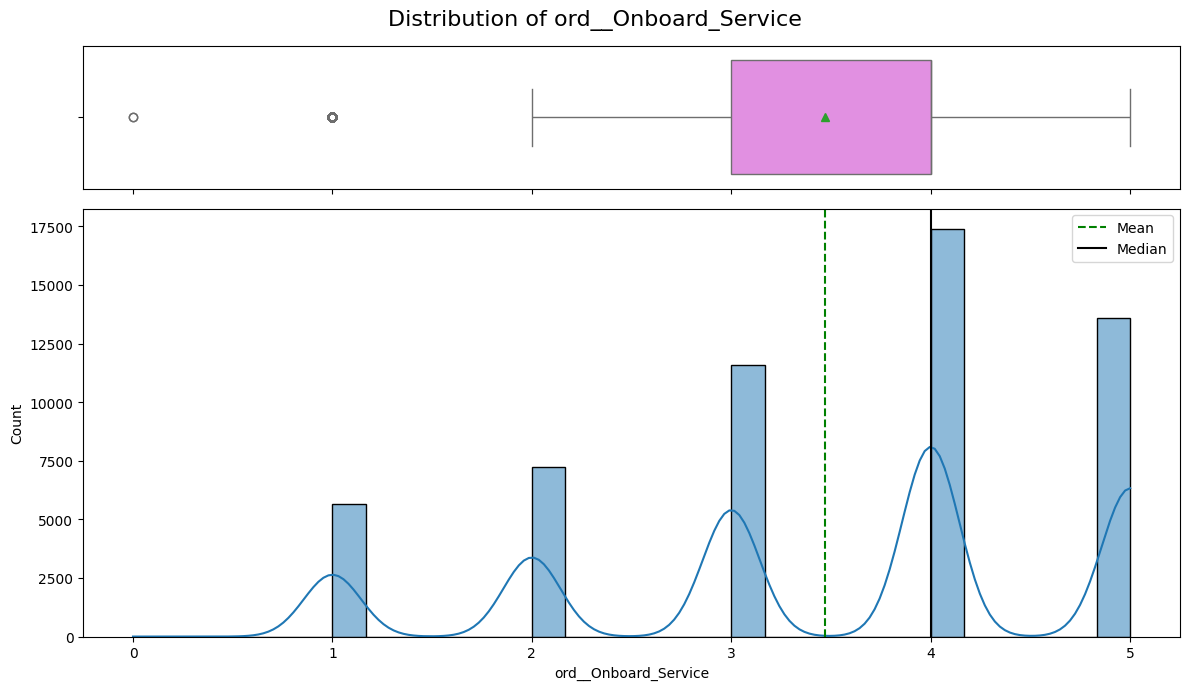


📊 Histogram & Boxplot for: ord__Legroom


/tmp/ipython-input-26-3135423096.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else \


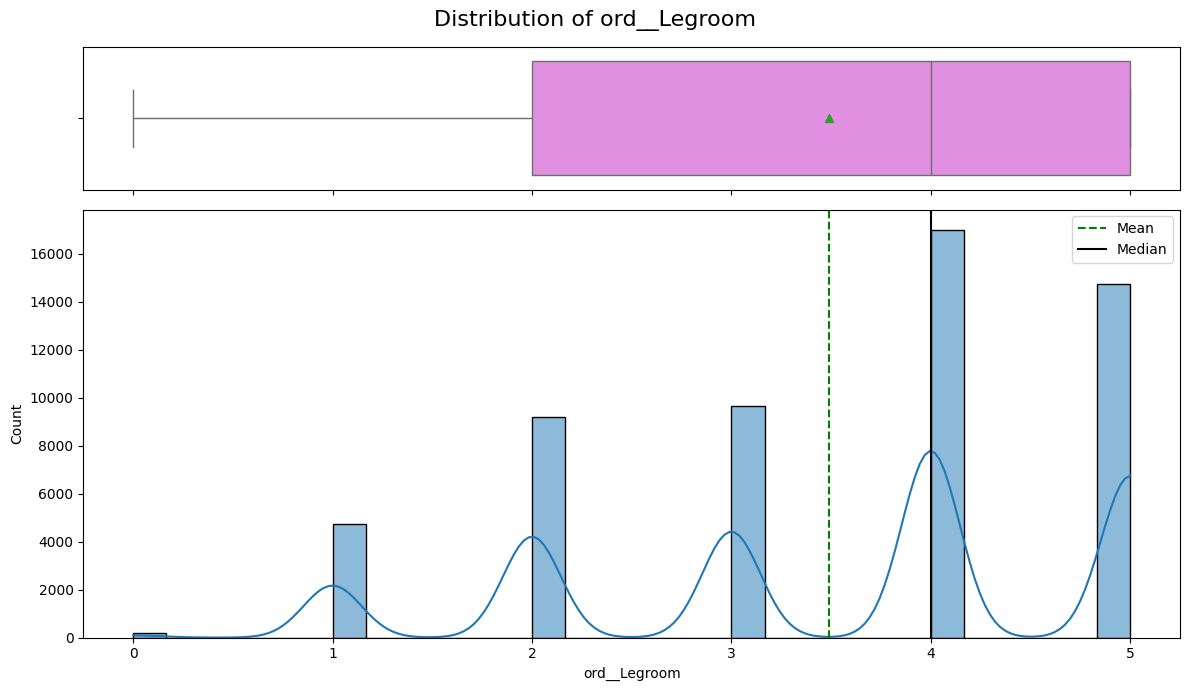


📊 Histogram & Boxplot for: ord__Baggage_Handling


/tmp/ipython-input-26-3135423096.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else \


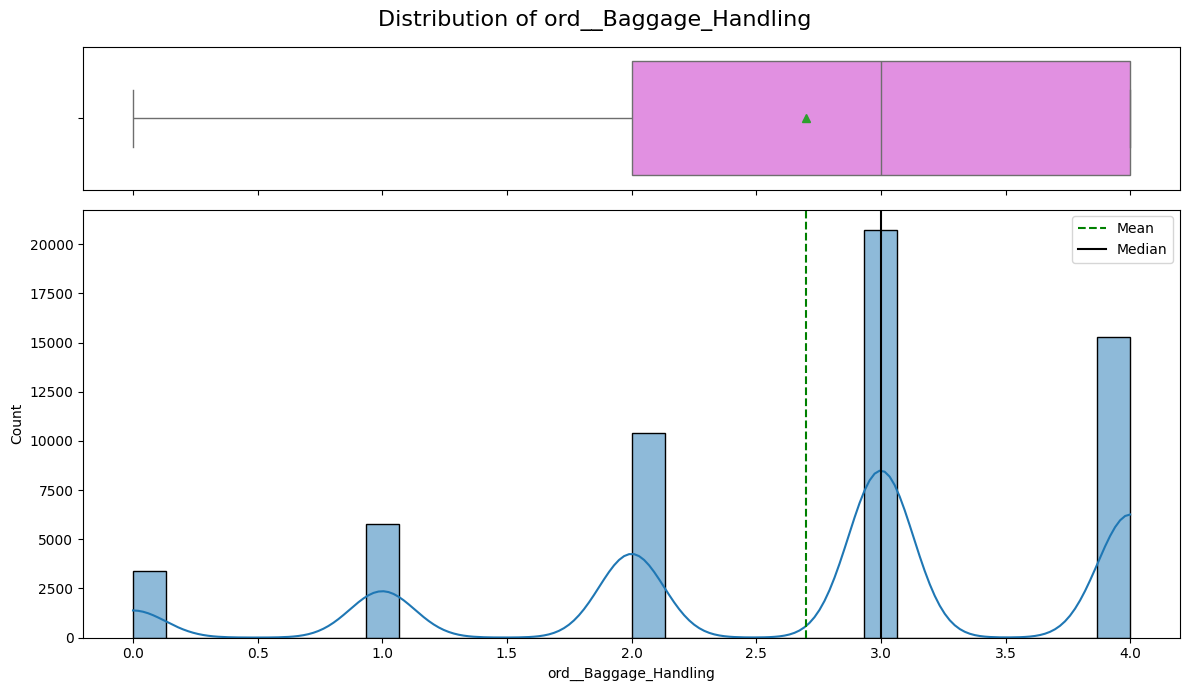


📊 Histogram & Boxplot for: ord__CheckIn_Service


/tmp/ipython-input-26-3135423096.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else \


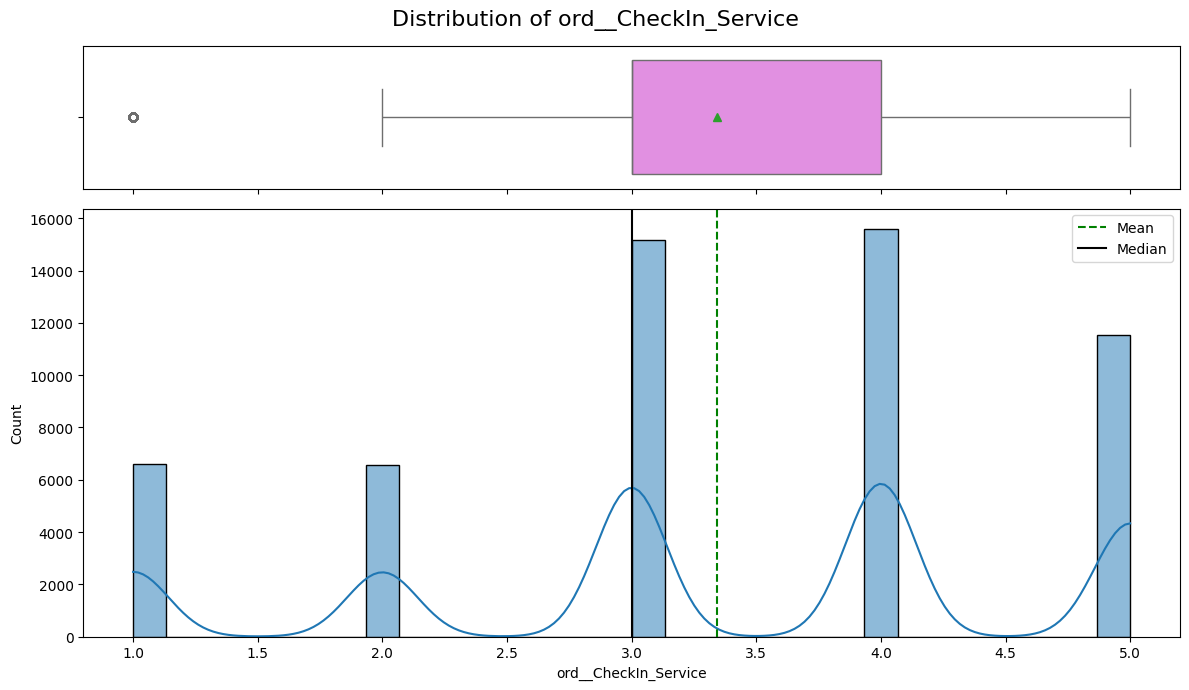


📊 Histogram & Boxplot for: ord__Cleanliness


/tmp/ipython-input-26-3135423096.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else \


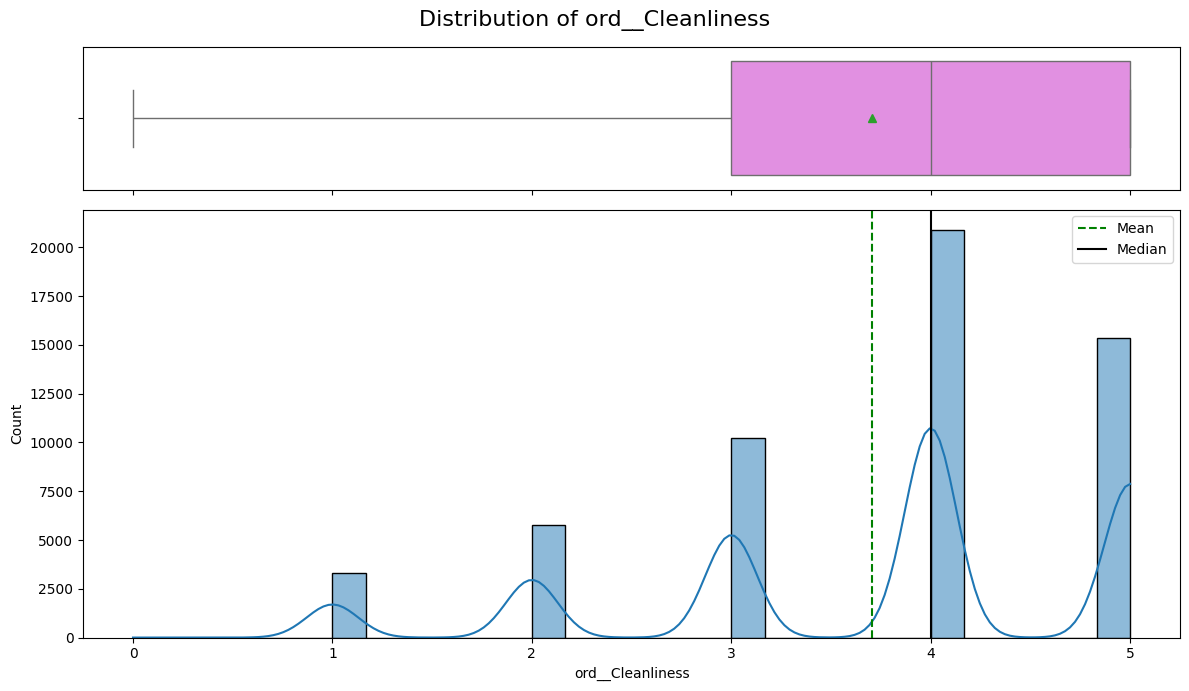


📊 Histogram & Boxplot for: ord__Online_Boarding


/tmp/ipython-input-26-3135423096.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else \


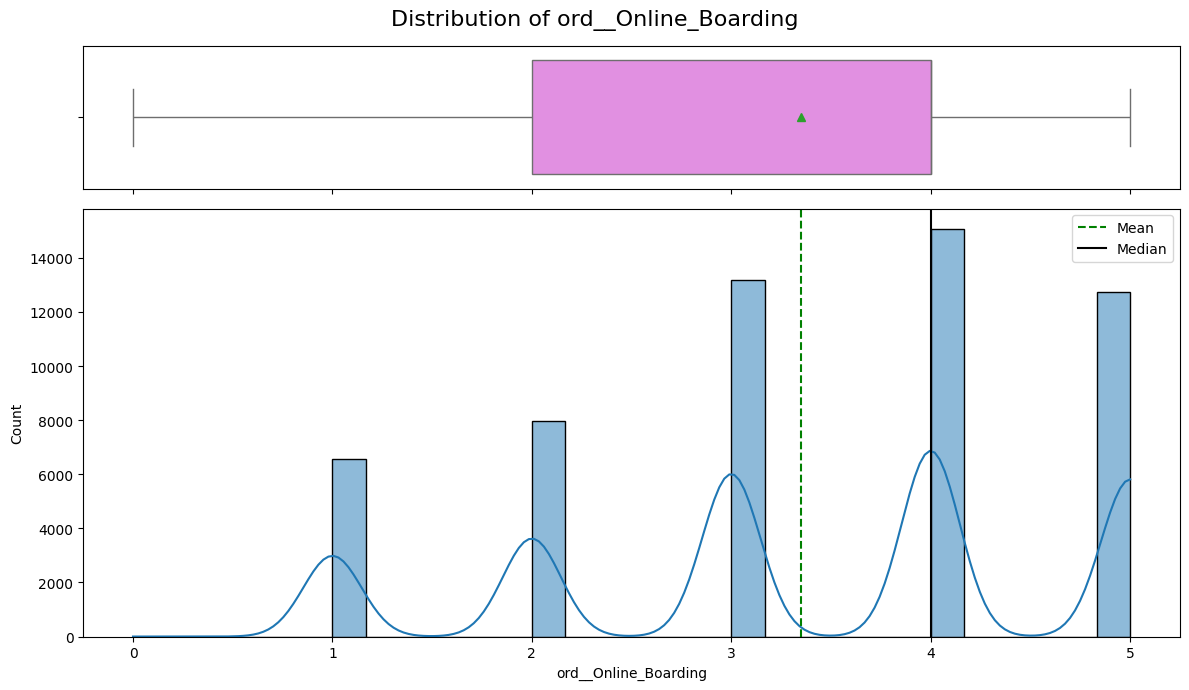


📊 Histogram & Boxplot for: ohe__Overall_Experience_True


/tmp/ipython-input-26-3135423096.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else \


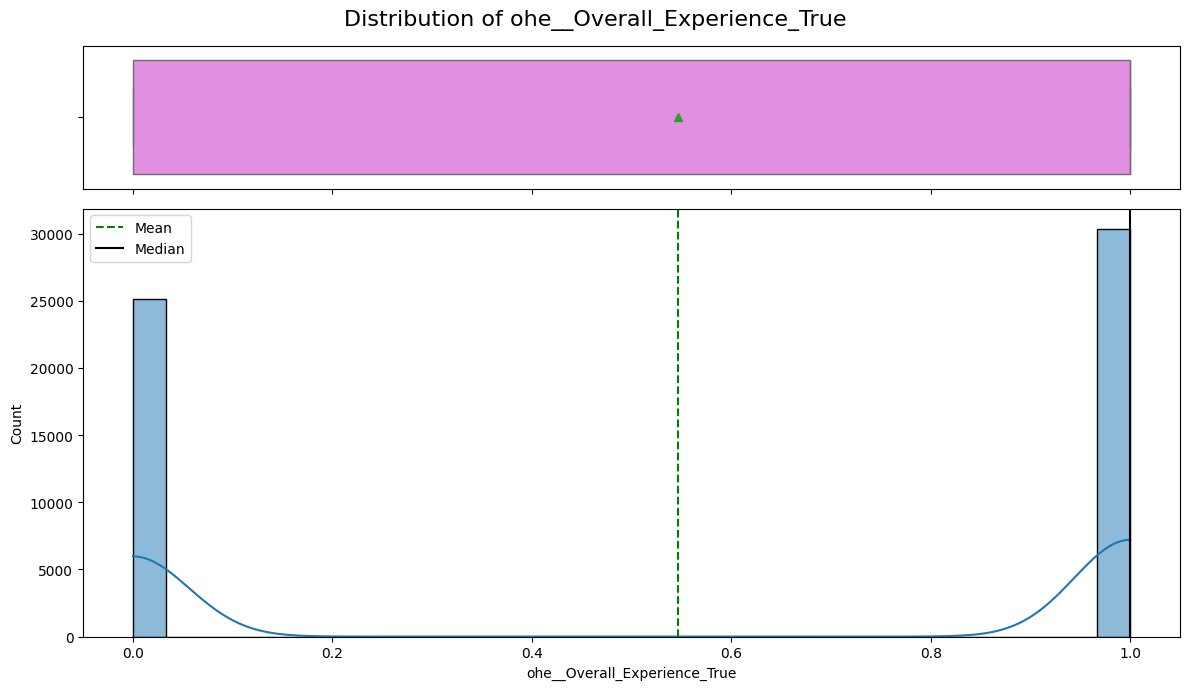


📊 Histogram & Boxplot for: ohe__Seat_Class_Ordinary


/tmp/ipython-input-26-3135423096.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else \


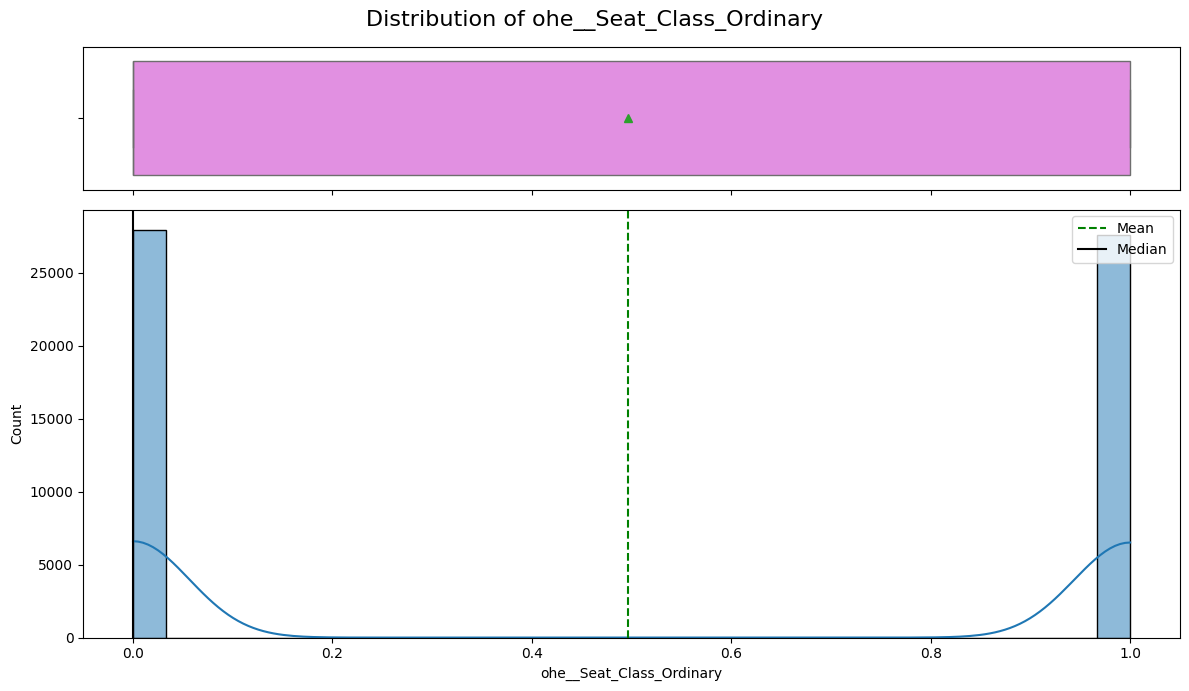


📊 Histogram & Boxplot for: ohe__Gender_Male


/tmp/ipython-input-26-3135423096.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else \


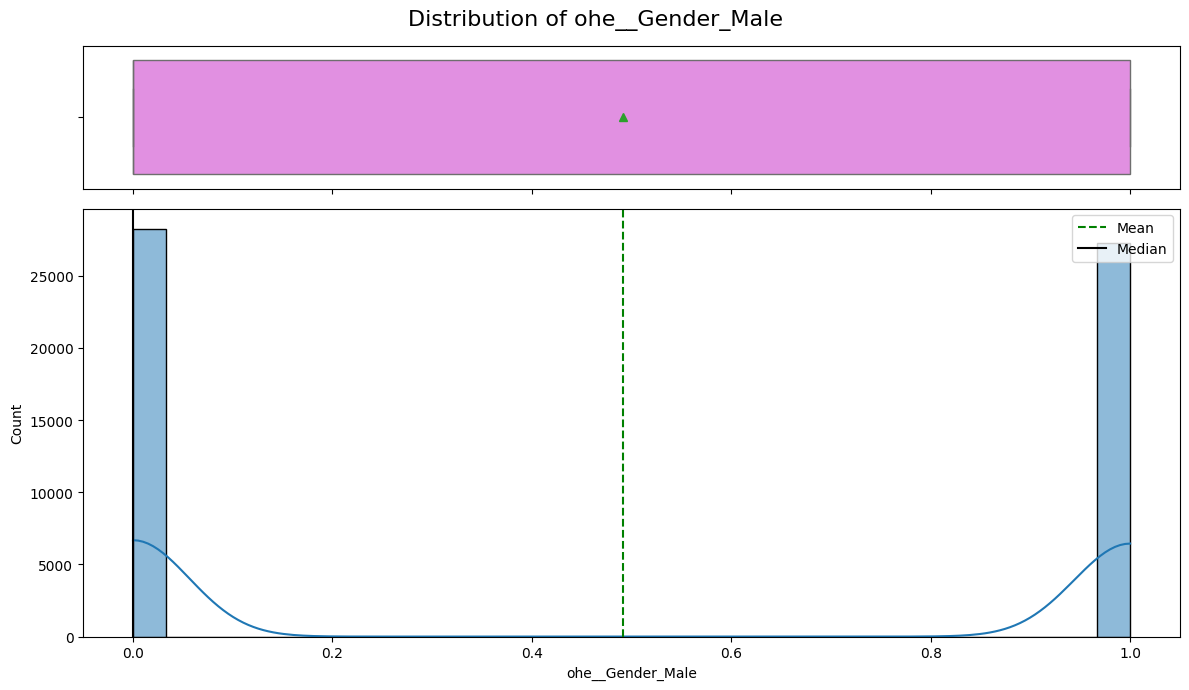


📊 Histogram & Boxplot for: ohe__Type_Travel_Personal Travel


/tmp/ipython-input-26-3135423096.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else \


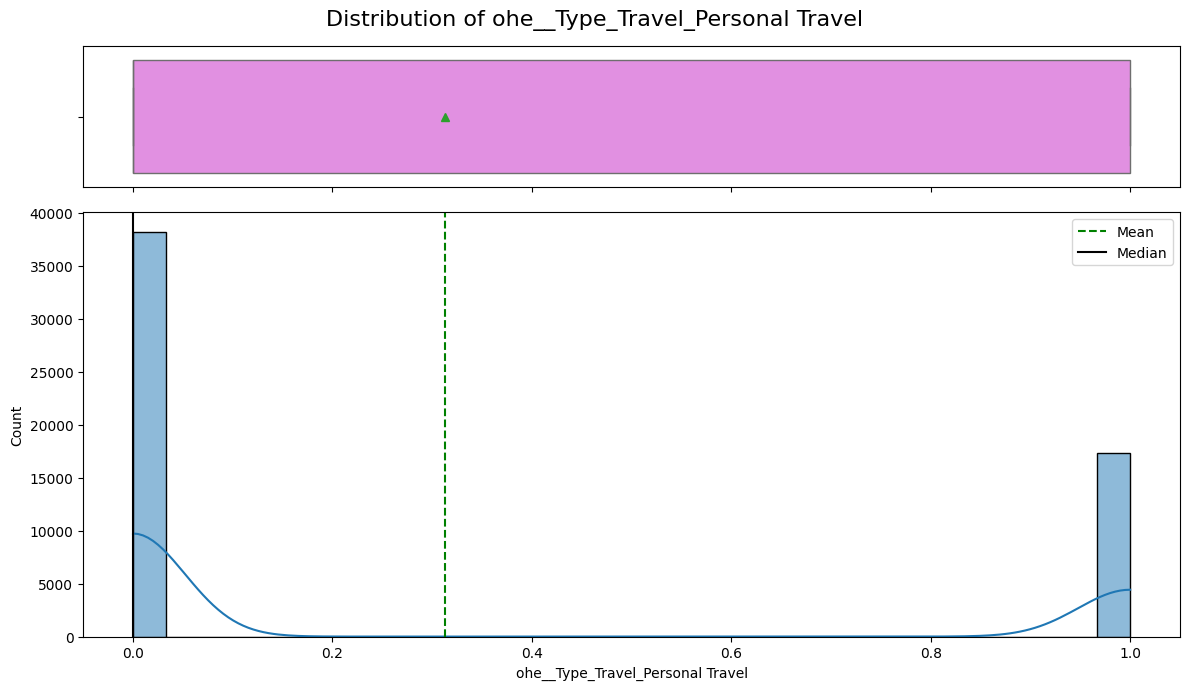


📊 Histogram & Boxplot for: ohe__Travel_Class_Eco


/tmp/ipython-input-26-3135423096.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else \


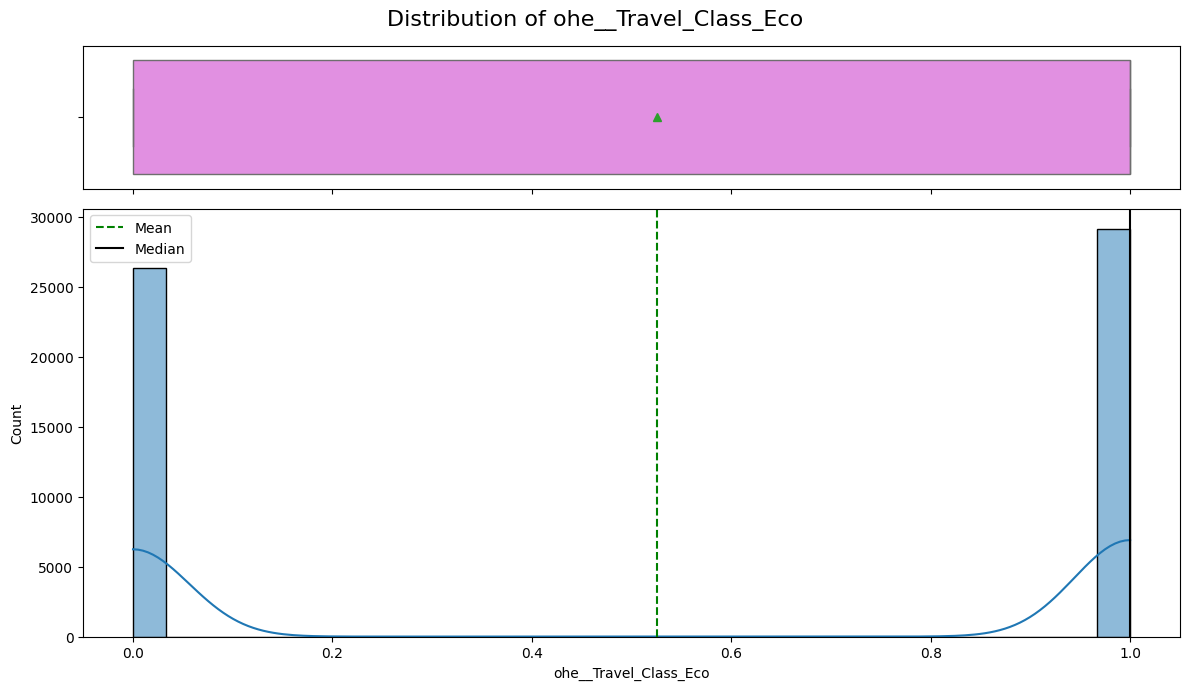


📊 Histogram & Boxplot for: ohe__Customer_Type_Loyal Customer


/tmp/ipython-input-26-3135423096.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else \


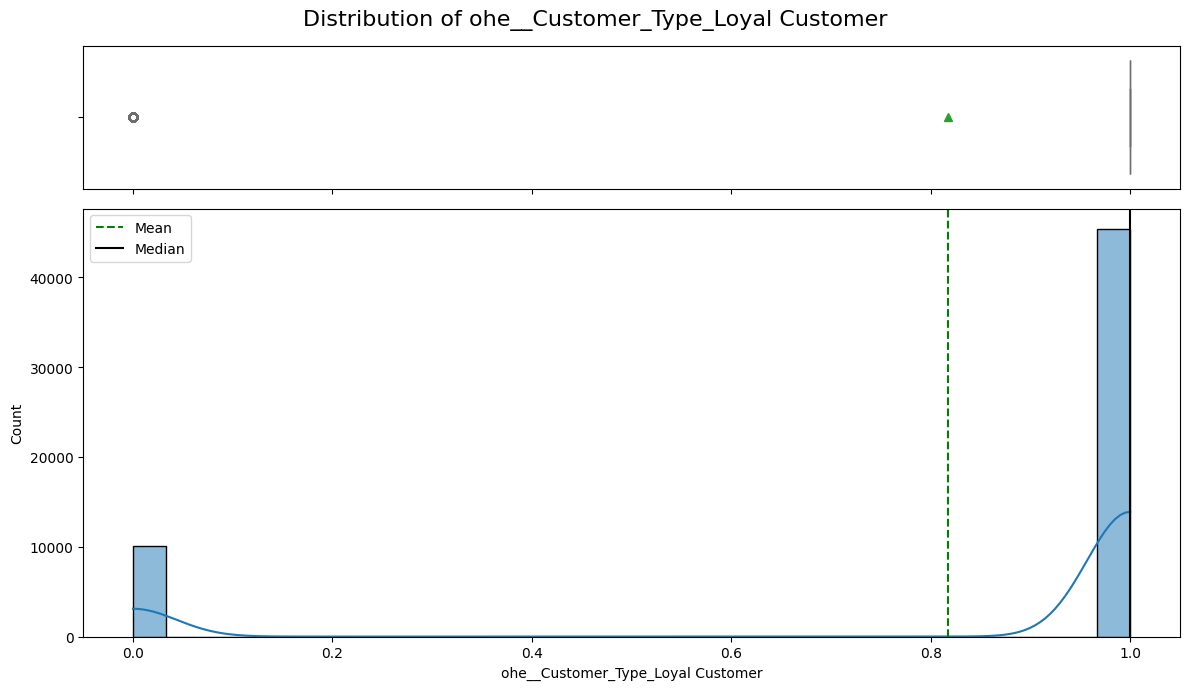


📊 Histogram & Boxplot for: Age


/tmp/ipython-input-26-3135423096.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else \


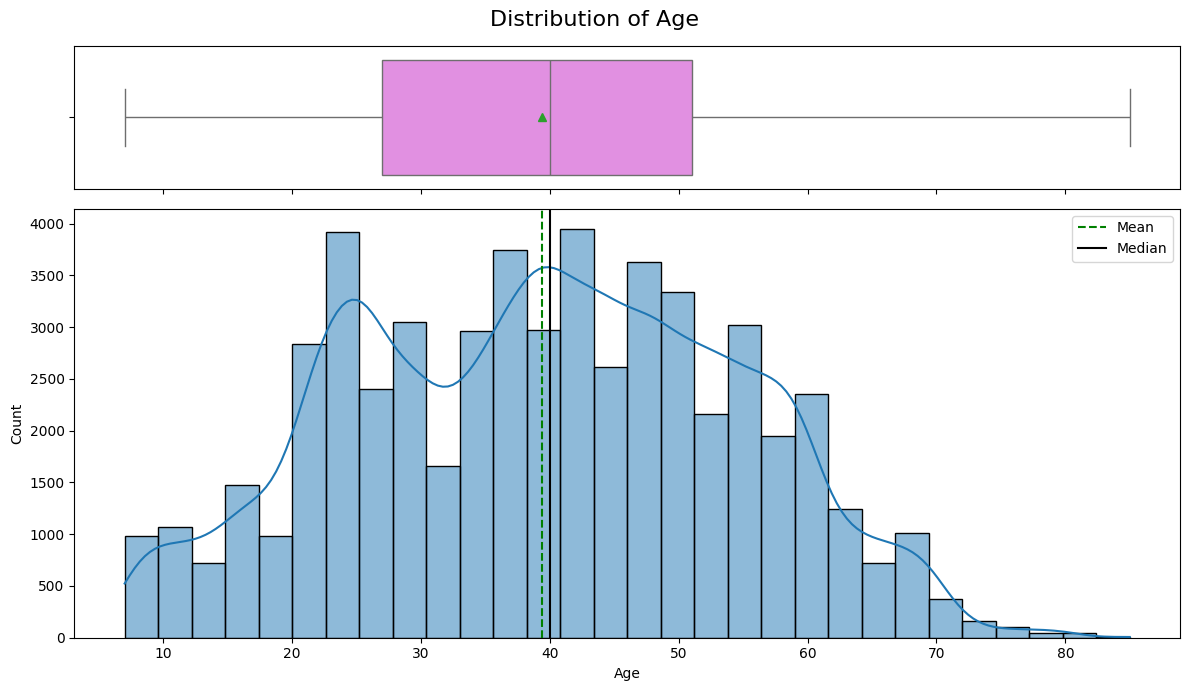


📊 Histogram & Boxplot for: Arrival_Delay_in_Mins


/tmp/ipython-input-26-3135423096.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else \


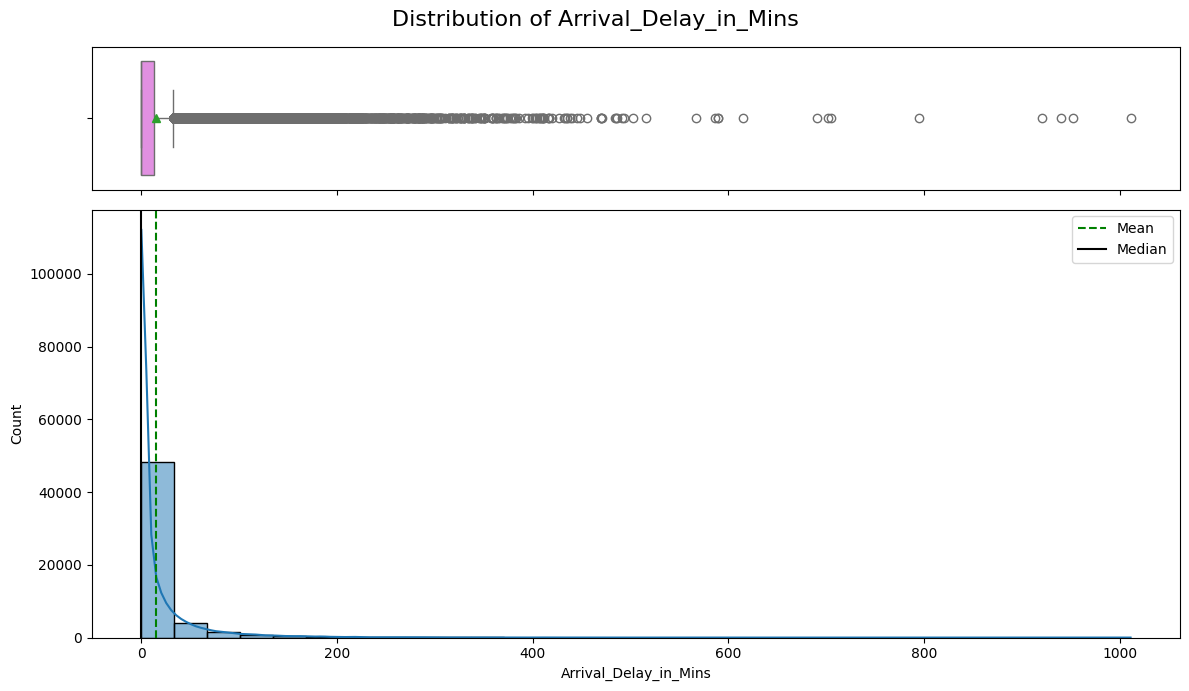


📊 Histogram & Boxplot for: Departure_Delay_in_Mins


/tmp/ipython-input-26-3135423096.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else \


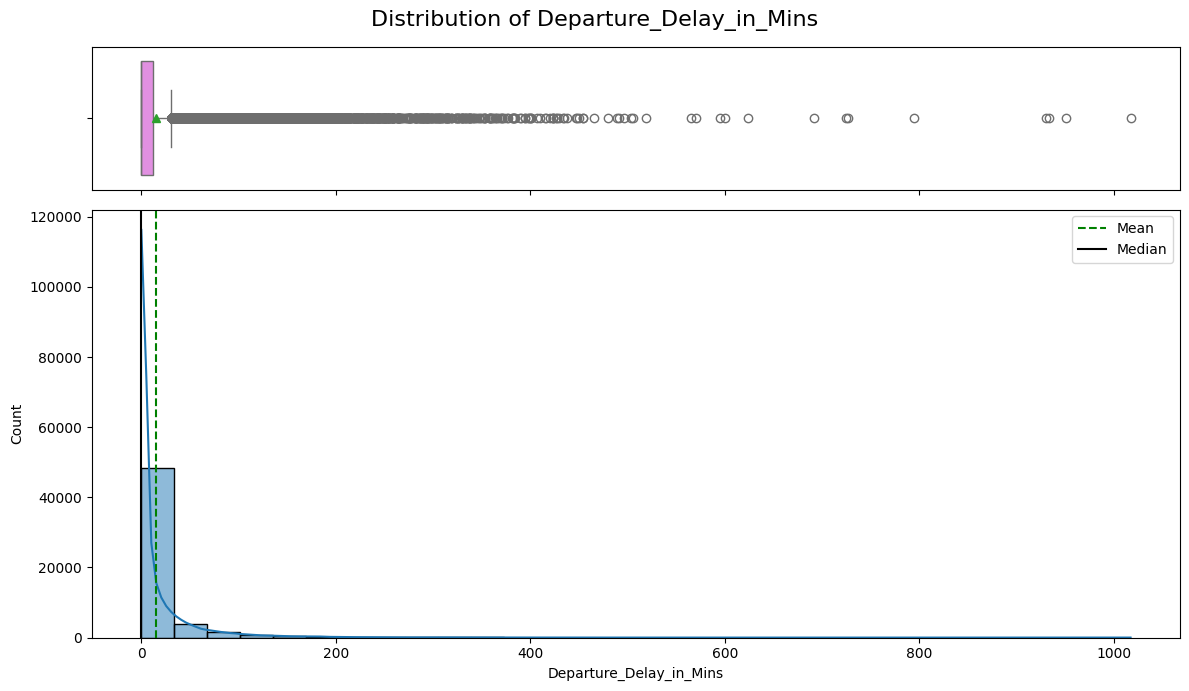


📊 Histogram & Boxplot for: Travel_Distance


/tmp/ipython-input-26-3135423096.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else \


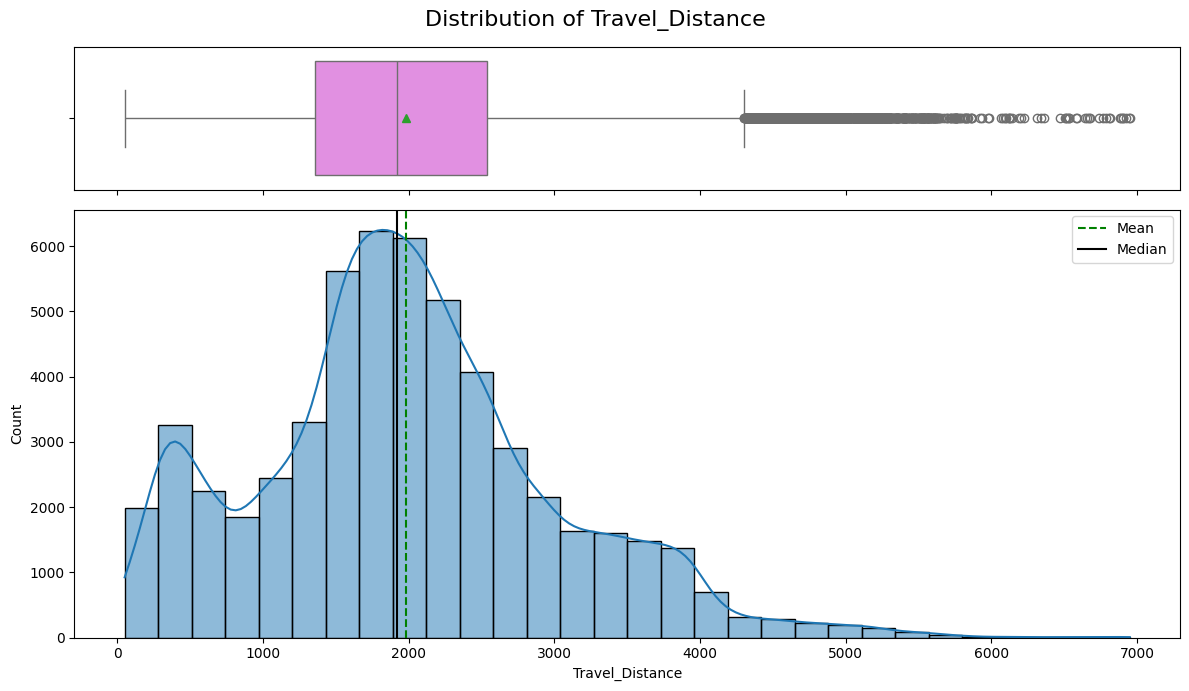

In [ ]:
for col in df_eda_ready.columns:
    print(f"\n📊 Histogram & Boxplot for: {col}")
    histogram_boxplot(data=df_eda_ready, feature=col, kde=True, bins=30)

In [ ]:
missing_summary = df.isnull().sum().to_frame('Missing Count')
missing_summary['% Missing'] = 100 * missing_summary['Missing Count'] / len(df)
missing_summary = missing_summary[missing_summary['Missing Count'] > 0].sort_values('% Missing', ascending=False)
print(missing_summary)


                         Missing Count  % Missing
Type_Travel                       9226   9.775480
Customer_Type                     8951   9.484101
Arrival_Time_Convenient           8930   9.461851
Catering                          8741   9.261594
Onboard_Service                   7601   8.053698
Arrival_Delay_in_Mins              357   0.378262
Baggage_Handling                   142   0.150457
Online_Support                      91   0.096420
Legroom                             90   0.095360
CheckIn_Service                     77   0.081586
Gender                              77   0.081586
Ease_of_Online_Booking              73   0.077348
Seat_Comfort                        61   0.064633
Departure_Delay_in_Mins             57   0.060395
Age                                 33   0.034965
Platform_Location                   30   0.031787
Onboard_Wifi_Service                30   0.031787
Onboard_Entertainment               18   0.019072
Cleanliness                          6   0.006357


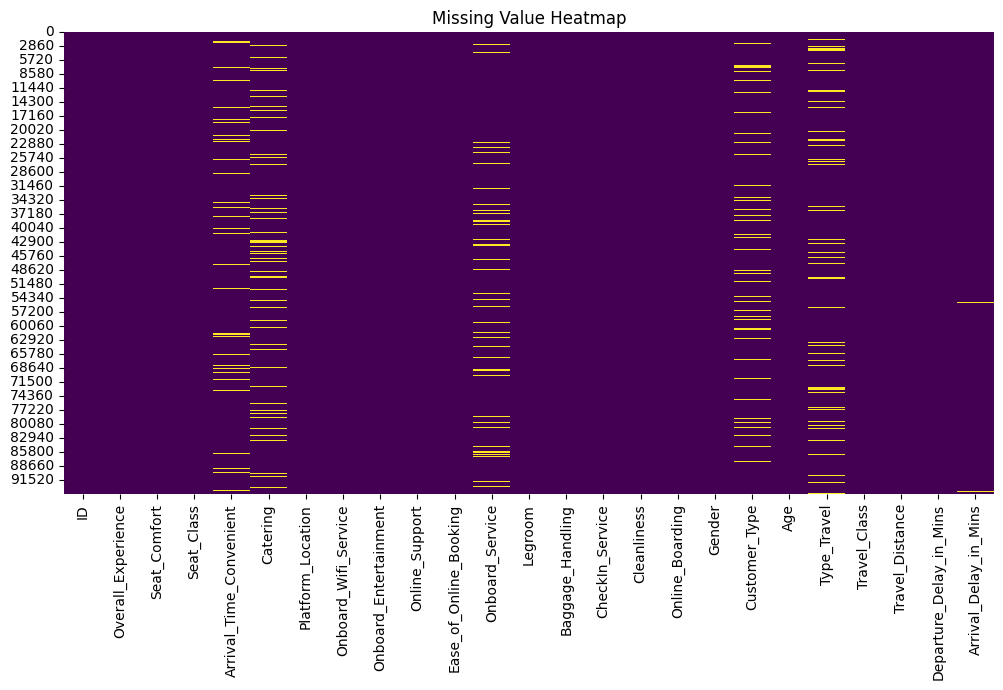

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

/tmp/ipython-input-30-2087314814.py:21: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


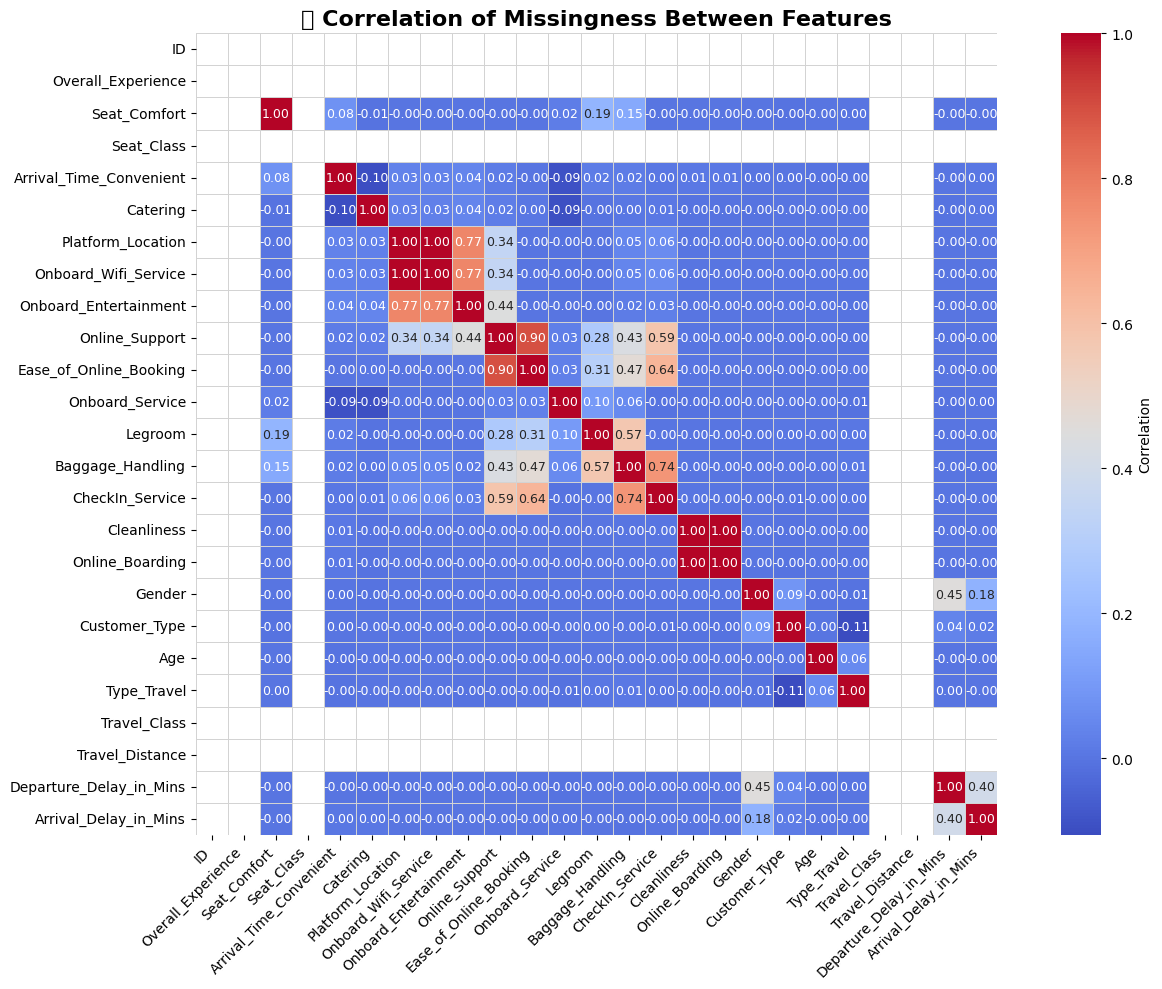

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

sns.heatmap(
    df.isnull().corr(),
    annot=True,
    fmt=".2f",                      # Limit float precision
    cmap='coolwarm',               # Diverging colormap
    cbar_kws={'label': 'Correlation'},
    linewidths=0.5,                # Lines between cells
    linecolor='lightgrey',         # Line color
    square=True,                   # Make cells square
    annot_kws={"size": 9}          # Smaller font for annotations
)

plt.title("🔍 Correlation of Missingness Between Features", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Imputing cat coloumns missing values as "missing" and encoding again

In [ ]:
data2= df.copy()

In [ ]:
# Explicitly assign ID column
id_col = ['ID']

# Identify categorical columns, excluding ID
cat_cols = data2.select_dtypes(include=['object', 'category', 'bool']).columns.difference(id_col).tolist()
data2[cat_cols] = data2[cat_cols].fillna("Missing")

# Identify numerical columns, excluding ID
num_cols = data2.select_dtypes(include='number').columns.difference(id_col).tolist()

# Create separate DataFrames
data2_id  = data2[id_col]
data2_cat = data2[cat_cols]
data2_num = data2[num_cols]

# Preview
print("ID Columns:", data2_id.columns.tolist())
print("Categorical Columns:", data2_cat.columns.tolist())
print("Numerical Columns:", data2_num.columns.tolist())

# Optional: Check samples
print(data2_id.head())
print(data2_cat.head())
print(data2_num.head())

ID Columns: ['ID']
Categorical Columns: ['Arrival_Time_Convenient', 'Baggage_Handling', 'Catering', 'CheckIn_Service', 'Cleanliness', 'Customer_Type', 'Ease_of_Online_Booking', 'Gender', 'Legroom', 'Onboard_Entertainment', 'Onboard_Service', 'Onboard_Wifi_Service', 'Online_Boarding', 'Online_Support', 'Overall_Experience', 'Platform_Location', 'Seat_Class', 'Seat_Comfort', 'Travel_Class', 'Type_Travel']
Numerical Columns: ['Age', 'Arrival_Delay_in_Mins', 'Departure_Delay_in_Mins', 'Travel_Distance']
         ID
0  98800001
1  98800002
2  98800003
3  98800004
4  98800005
  Arrival_Time_Convenient   Baggage_Handling           Catering    CheckIn_Service        Cleanliness   Customer_Type Ease_of_Online_Booking  Gender            Legroom Onboard_Entertainment    Onboard_Service Onboard_Wifi_Service Online_Boarding Online_Support  Overall_Experience  Platform_Location Seat_Class       Seat_Comfort Travel_Class      Type_Travel
0               Excellent  Needs Improvement          Excellent

In [ ]:
for col in data2_cat.columns:
    unique_vals = data2_cat[col].dropna().unique().tolist()
    print(f"{col}:")
    for val in unique_vals:
        print(f"  - {val}")
    print()

Arrival_Time_Convenient:
  - Excellent
  - Needs Improvement
  - Acceptable
  - Missing
  - Good
  - Poor
  - Extremely Poor

Baggage_Handling:
  - Needs Improvement
  - Poor
  - Excellent
  - Acceptable
  - Good
  - Missing

Catering:
  - Excellent
  - Poor
  - Needs Improvement
  - Missing
  - Acceptable
  - Good
  - Extremely Poor

CheckIn_Service:
  - Good
  - Needs Improvement
  - Acceptable
  - Excellent
  - Poor
  - Missing
  - Extremely Poor

Cleanliness:
  - Needs Improvement
  - Good
  - Excellent
  - Acceptable
  - Poor
  - Extremely Poor
  - Missing

Customer_Type:
  - Loyal Customer
  - Disloyal Customer
  - Missing

Ease_of_Online_Booking:
  - Needs Improvement
  - Good
  - Excellent
  - Acceptable
  - Poor
  - Missing
  - Extremely Poor

Gender:
  - Female
  - Male
  - Missing

Legroom:
  - Acceptable
  - Needs Improvement
  - Excellent
  - Good
  - Poor
  - Extremely Poor
  - Missing

Onboard_Entertainment:
  - Needs Improvement
  - Poor
  - Good
  - Excellent
  - Accep

In [ ]:
data2.head(5)

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,False,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor,Female,Loyal Customer,52.0,Missing,Business,272,0.0,5.0
1,98800002,False,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,True,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,False,Acceptable,Ordinary,Needs Improvement,Missing,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,True,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Define column groups
ordinal_cols2 = [
    "Seat_Comfort", "Arrival_Time_Convenient", "Catering", "Platform_Location",
    "Onboard_Wifi_Service", "Onboard_Entertainment", "Online_Support",
    "Ease_of_Online_Booking", "Onboard_Service", "Legroom", "Baggage_Handling",
    "CheckIn_Service", "Cleanliness", "Online_Boarding"
]

nominal_binary_cols2 = [
    "Overall_Experience", "Seat_Class", "Gender", "Type_Travel", "Travel_Class", "Customer_Type"
]

# Define category orders for ordinal columns (based on your JSON)
ordinal_categories = [
    ["Missing","Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],  # Seat_Comfort
    ["Missing","Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],  # Arrival_Time_Convenient
    ["Missing","Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],  # Catering
    ["Missing","Very Inconvenient", "Inconvenient", "Needs Improvement", "Manageable", "Convenient", "Very Convenient"],  # Platform_Location
    ["Missing","Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],  # Onboard_Wifi_Service
    ["Missing","Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],  # Onboard_Entertainment
    ["Missing","Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],  # Online_Support
    ["Missing","Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],  # Ease_of_Online_Booking
    ["Missing","Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],  # Onboard_Service
    ["Missing","Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],  # Legroom
    ["Missing","Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],                    # Baggage_Handling
    ["Missing","Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],  # CheckIn_Service
    ["Missing","Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],  # Cleanliness
    ["Missing","Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],  # Online_Boarding
]

# Set up encoders
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)
onehot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Build the transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_encoder, ordinal_cols),
        ('ohe', onehot_encoder, nominal_binary_cols)
    ]
)

In [ ]:
df_cat2_for_encoding = data2[cat_cols].copy()        # for encoding
df_cat2_with_id = data2[id_col + cat_cols].copy()    # save for later merge
df_cat2_clean = df_cat2_for_encoding.dropna()
df_num2_clean = data2.loc[df_cat2_clean.index, num_cols]
df_id2_clean = data2.loc[df_cat2_clean.index, id_col]
X_encoded2 = preprocessor.fit_transform(df_cat2_clean)
encoded_cols2 = preprocessor.get_feature_names_out()
df_encoded2 = pd.DataFrame(X_encoded2, columns=encoded_cols2, index=df_cat2_clean.index)
# This gives you an EDA-ready dataset
df_model_ready = pd.concat([df_id2_clean.reset_index(drop=True),
                          df_encoded2.reset_index(drop=True),
                          df_num2_clean.reset_index(drop=True)],
                         axis=1)

In [ ]:
df_model_ready.to_excel("encoded_data2.xlsx", index=False)
from google.colab import files
files.download("encoded_data2.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

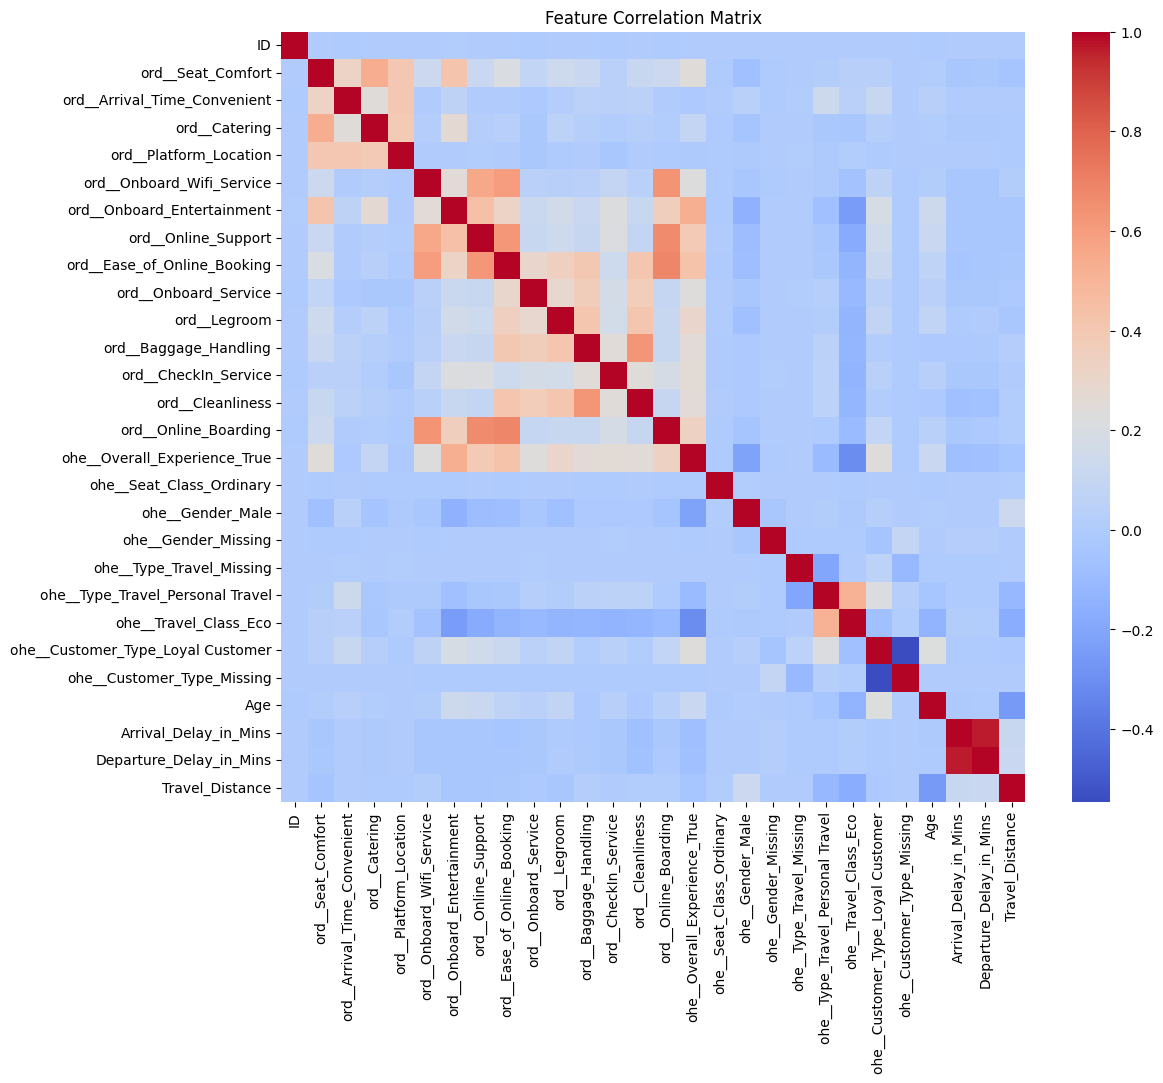

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_model_ready.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

# Pre processing for model traing:
Scaled, VIF-reduced X for Logistic + MLP

Raw, encoded X (no scaling or VIF) for RF/XGB

# Cultural reasearch
# In summary, bullet train vs. plane in Japan is akin to convenience vs. speed: up to mid-range distances, the convenience usually wins out due to the Shinkansen’s stellar service and city-center connectivity.
# This resonates with the Japanese travel style of maximizing time and minimizing stress.
# Shinkansen occupies a unique niche: it’s fast, extremely reliable, and culturally esteemed

In [ ]:
df_model_ready.head(5)

,ID,ord__Seat_Comfort,ord__Arrival_Time_Convenient,ord__Catering,ord__Platform_Location,ord__Onboard_Wifi_Service,ord__Onboard_Entertainment,ord__Online_Support,ord__Ease_of_Online_Booking,ord__Onboard_Service,ord__Legroom,ord__Baggage_Handling,ord__CheckIn_Service,ord__Cleanliness,ord__Online_Boarding,ohe__Overall_Experience_True,ohe__Seat_Class_Ordinary,ohe__Gender_Male,ohe__Gender_Missing,ohe__Type_Travel_Missing,ohe__Type_Travel_Personal Travel,ohe__Travel_Class_Eco,ohe__Customer_Type_Loyal Customer,ohe__Customer_Type_Missing,Age,Arrival_Delay_in_Mins,Departure_Delay_in_Mins,Travel_Distance
0,98800001,3.0,6.0,6.0,6.0,5.0,3.0,4.0,3.0,3.0,4.0,2.0,5.0,3.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,52.0,5.0,0.0,272
1,98800002,2.0,6.0,2.0,3.0,5.0,2.0,5.0,5.0,6.0,3.0,1.0,3.0,5.0,5.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,48.0,0.0,9.0,2200
2,98800003,3.0,3.0,3.0,3.0,3.0,5.0,6.0,6.0,6.0,6.0,5.0,5.0,6.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,43.0,119.0,77.0,1061
3,98800004,4.0,3.0,0.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,5.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,44.0,18.0,13.0,780
4,98800005,4.0,4.0,4.0,4.0,3.0,5.0,6.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,50.0,0.0,0.0,1981


In [ ]:
# Create transit delay--> reliability/esteem/efforts to maximizing time captured hopefully
df_model_ready["transit_delay"] = df_model_ready["Arrival_Delay_in_Mins"] - df_model_ready["Departure_Delay_in_Mins"]

# Drop arrival delay (optional but good if it's collinear) -->Keeping departure delay as that will tell us what the stress factor was
df_model_ready.drop(columns=["Arrival_Delay_in_Mins"], inplace=True)

In [ ]:
df_model_ready2=data2.copy()
print(df_model_ready2.head(5))
# Create transit delay--> reliability/esteem/efforts to maximizing time captured hopefully
df_model_ready2["transit_delay"] = data2["Arrival_Delay_in_Mins"] - data2["Departure_Delay_in_Mins"]

# Drop arrival delay (optional but good if it's collinear) -->Keeping departure delay as that will tell us what the stress factor was
df_model_ready2.drop(columns=["Arrival_Delay_in_Mins"], inplace=True)
print(df_model_ready2.head(5))

         ID  Overall_Experience       Seat_Comfort Seat_Class Arrival_Time_Convenient           Catering  Platform_Location Onboard_Wifi_Service Onboard_Entertainment Online_Support Ease_of_Online_Booking    Onboard_Service            Legroom   Baggage_Handling    CheckIn_Service        Cleanliness Online_Boarding  Gender   Customer_Type   Age      Type_Travel Travel_Class  Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins
0  98800001               False  Needs Improvement  Green Car               Excellent          Excellent    Very Convenient                 Good     Needs Improvement     Acceptable      Needs Improvement  Needs Improvement         Acceptable  Needs Improvement               Good  Needs Improvement            Poor  Female  Loyal Customer  52.0          Missing     Business              272                      0.0                    5.0
1  98800002               False               Poor   Ordinary               Excellent               Poor  Needs Improv

In [ ]:
df_model_ready.head(5)

,ID,ord__Seat_Comfort,ord__Arrival_Time_Convenient,ord__Catering,ord__Platform_Location,ord__Onboard_Wifi_Service,ord__Onboard_Entertainment,ord__Online_Support,ord__Ease_of_Online_Booking,ord__Onboard_Service,ord__Legroom,ord__Baggage_Handling,ord__CheckIn_Service,ord__Cleanliness,ord__Online_Boarding,ohe__Overall_Experience_True,ohe__Seat_Class_Ordinary,ohe__Gender_Male,ohe__Gender_Missing,ohe__Type_Travel_Missing,ohe__Type_Travel_Personal Travel,ohe__Travel_Class_Eco,ohe__Customer_Type_Loyal Customer,ohe__Customer_Type_Missing,Age,Departure_Delay_in_Mins,Travel_Distance,transit_delay
0,98800001,3.0,6.0,6.0,6.0,5.0,3.0,4.0,3.0,3.0,4.0,2.0,5.0,3.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,52.0,0.0,272,5.0
1,98800002,2.0,6.0,2.0,3.0,5.0,2.0,5.0,5.0,6.0,3.0,1.0,3.0,5.0,5.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,48.0,9.0,2200,-9.0
2,98800003,3.0,3.0,3.0,3.0,3.0,5.0,6.0,6.0,6.0,6.0,5.0,5.0,6.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,43.0,77.0,1061,42.0
3,98800004,4.0,3.0,0.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,5.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,44.0,13.0,780,5.0
4,98800005,4.0,4.0,4.0,4.0,3.0,5.0,6.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,50.0,0.0,1981,0.0




```
# This is formatted as code
```



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
# Drop non-predictive columns like ID
df_model_final = df_model_ready.drop(columns=["ID"])

# Separate features and target
X = df_model_final.drop(columns=["ohe__Overall_Experience_True"])  # replace 'target' with your actual column name
y = df_model_final["ohe__Overall_Experience_True"]

In [ ]:
# Drop non-predictive columns like ID
df_model_tree2 = df_model_ready2.drop(columns=["ID"])

# Separate features and target
X2 = df_model_tree2 .drop(columns=["Overall_Experience"])  # replace 'target' with your actual column name
y2= df_model_tree2 ["Overall_Experience"]

In [ ]:
print(X)
print(y)
print(X2)
print(y2)

       ord__Seat_Comfort  ord__Arrival_Time_Convenient  ord__Catering  ord__Platform_Location  ord__Onboard_Wifi_Service  ord__Onboard_Entertainment  ord__Online_Support  ord__Ease_of_Online_Booking  ord__Onboard_Service  ord__Legroom  ord__Baggage_Handling  ord__CheckIn_Service  ord__Cleanliness  ord__Online_Boarding  ohe__Seat_Class_Ordinary  ohe__Gender_Male  ohe__Gender_Missing  ohe__Type_Travel_Missing  ohe__Type_Travel_Personal Travel  ohe__Travel_Class_Eco  ohe__Customer_Type_Loyal Customer  ohe__Customer_Type_Missing   Age  Departure_Delay_in_Mins  Travel_Distance  transit_delay
0                    3.0                           6.0            6.0                     6.0                        5.0                         3.0                  4.0                          3.0                   3.0           4.0                    2.0                   5.0               3.0                   2.0                       0.0               0.0                  0.0                      

# Scaled, VIF-reduced X for Logistic + MLP



Handling imputation

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd
iter_imputer = IterativeImputer(random_state=0)
X_iter_imputed = pd.DataFrame(iter_imputer.fit_transform(X), columns=X.columns)


In [ ]:
# Add constant for VIF computation
X_const = add_constant(X_iter_imputed)

# Calculate VIF scores
vif = pd.Series(
    [variance_inflation_factor(X_const.values, i) for i in range(1, X_const.shape[1])],
    index=X_iter_imputed.columns
)

X_const.isnull().values.any()
X_const.isnull().sum().sum()

np.int64(0)

In [ ]:
print(X_const.isnull().values.any())
print(X_const.isnull().sum().sum())


False
0


In [ ]:
print(vif)

ord__Seat_Comfort                    1.964660
ord__Arrival_Time_Convenient         1.305999
ord__Catering                        1.517281
ord__Platform_Location               1.473671
ord__Onboard_Wifi_Service            2.016894
ord__Onboard_Entertainment           1.831139
ord__Online_Support                  2.344993
ord__Ease_of_Online_Booking          3.612207
ord__Onboard_Service                 1.265396
ord__Legroom                         1.383071
ord__Baggage_Handling                1.894444
ord__CheckIn_Service                 1.203496
ord__Cleanliness                     1.969651
ord__Online_Boarding                 2.651873
ohe__Seat_Class_Ordinary             1.000277
ohe__Gender_Male                     1.055338
ohe__Gender_Missing                  1.009165
ohe__Type_Travel_Missing             1.088222
ohe__Type_Travel_Personal Travel     1.802228
ohe__Travel_Class_Eco                1.735277
ohe__Customer_Type_Loyal Customer    1.953264
ohe__Customer_Type_Missing        

In [ ]:
# Filter out features with high multicollinearity (VIF >= 10)
features_to_keep = vif[vif < 10].index.tolist()

# None have VIF >10 so going fwd with Xconst

# Step 1: Drop the constant column (if present)
if "const" in X_const.columns:
    X_no_const = X_const.drop(columns="const")
else:
    X_no_const = X_const.copy()

In [ ]:
print(X_vif_reduced)
len(X_vif_reduced.columns)
vif.shape[0]

NameError: name 'X_vif_reduced' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_and_imp = pd.DataFrame(scaler.fit_transform(X_no_const), columns=X_no_const.columns)
print(X_scaled_and_imp.head(5))


In [ ]:
print(X_scaled_and_imp.isnull().values.any())
print(X_scaled_and_imp.isnull().sum().sum())


# Raw, encoded X (no scaling or VIF) for RF/XGB

In [ ]:
X_tree = X.copy()  # Raw, encoded X for Random Forest, XGBoost, etc.
X2_tree = X2.copy()


In [ ]:
print(X_tree .head(5))


Fianl spliting within the training dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train_log, X_val_log, y_train_log, y_val_log = train_test_split(X_scaled_and_imp, y, test_size=0.2, stratify=y, random_state=42)
X_train_tree, X_val_tree, y_train_tree, y_val_tree = train_test_split(X_tree, y, test_size=0.2, stratify=y, random_state=42)


I realized I passed ordinal dataset encoded --> i dont know if semantically very inconvinient - inconvinient is represented by 2-1 after encoding as the tress would take them linear? so I am going to create another X_train tree 2 with labels presrved by missing data still passed as label signals of missing --> using Calboost for preserving sematic integrity

In [ ]:
print(x2)
print(y2)

# Model training and evaluation

**Importing Models**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

**Evaluation Function**

In [ ]:
def evaluate_model(model, X_val, y_val, model_name=""):
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]

    print(f"\n--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("F1 Score:", f1_score(y_val, y_pred))
    print("AUC:", roc_auc_score(y_val, y_prob))
    print("Classification Report:\n", classification_report(y_val, y_pred))

**Results: Define, Train, Evaluate Models**

In [ ]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_model.fit(X_train_log, y_train_log)
evaluate_model(log_model, X_val_log, y_val_log, "Logistic Regression")

# MLP Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
mlp_model.fit(X_train_log, y_train_log)
evaluate_model(mlp_model, X_val_log, y_val_log, "MLP Classifier")

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train_tree, y_train_tree)
evaluate_model(rf_model, X_val_tree, y_val_tree, "Random Forest")

# XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1, random_state=42)
xgb_model.fit(X_train_log, y_train_log)
evaluate_model(xgb_model, X_val_log, y_val_log, "XGBoost")




In [ ]:
# MLP Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
mlp_model.fit(X_train_log, y_train_log)
evaluate_model(mlp_model, X_val_log, y_val_log, "MLP Classifier")


In [ ]:
# XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1, random_state=42)
xgb_model.fit(X_train_log, y_train_log)
evaluate_model(xgb_model, X_val_log, y_val_log, "XGBoost")

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
rf_importance = rf_model.feature_importances_
rf_features = X_train_tree.columns

# Plot
pd.Series(rf_importance, index=rf_features).sort_values(ascending=True).plot(kind='barh', figsize=(10, 8))
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

In [ ]:
X_train_log.head(5)

In [ ]:
xgb_importance = xgb_model.feature_importances_
xgb_features = X_train_tree.columns

pd.Series(xgb_importance, index=xgb_features).sort_values(ascending=True).plot(kind='barh', figsize=(10, 8))
plt.title("XGBoost Feature Importances")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

result = permutation_importance(mlp_model, X_val_log, y_val_log, n_repeats=10, random_state=42, scoring='f1')

# Plot
importances = pd.Series(result.importances_mean, index=X_val_log.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 8))
plt.title("Permutation Feature Importance (MLP)")
plt.tight_layout()
plt.show()

In [ ]:
print(X)
print(y)
print(X2)
print(y2)

Going for CatBoost

In [ ]:
pip install catboost

In [ ]:
categorical_cols_X2 = X2.select_dtypes(include='object').columns.tolist()
print(categorical_cols_X2)

In [ ]:
from sklearn.model_selection import train_test_split

X2_train, X2_val, y2_train, y2_val = train_test_split(X2, y2, test_size=0.2, stratify=y2, random_state=42)


In [ ]:
from catboost import Pool

train_pool = Pool(data=X2_train, label=y2_train, cat_features=categorical_cols_X2)
val_pool = Pool(data=X2_val, label=y2_val, cat_features=categorical_cols_X2)


In [ ]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.1,
    loss_function='Logloss',
    verbose=100,
    random_seed=42
)

cat_model.fit(train_pool, eval_set=val_pool)


In [ ]:
import shap
# Use the same validation data you used for evaluation
explainer = shap.TreeExplainer(cat_model)
shap_values = explainer.shap_values(X2_val)
shap.summary_plot(shap_values, X2_val)
shap.summary_plot(shap_values, X2_val, plot_type="bar")
row_index = 0
shap.force_plot(explainer.expected_value, shap_values[row_index], X2_val.iloc[row_index], matplotlib=True)
shap.summary_plot(shap_values[:1000], X2_val.iloc[:1000])

Transit delay is the least -> makes sense train is picking up mostly in transit the time lost, 75% is 0% and thats tells us,

In [ ]:
# Basic descriptive statistics
transit_delay_stats = data2['transit_delay'].describe()

# Count missing values
missing_count = X2['transit_delay'].isnull().sum()

# Print both
print("Transit Delay Stats:\n", transit_delay_stats)
print("\nMissing values:", missing_count)

In [ ]:
import shap

# Index of the sample you want to analyze (e.g., first row in your validation set)
i = 0

# Create the SHAP Explanation object (required for new API)
explanation = shap.Explanation(
    values=shap_values[i],                   # SHAP values for the i-th instance
    base_values=explainer.expected_value,    # Expected value of the model (baseline)
    data=X2_val.iloc[i],                     # Feature values for the instance
    feature_names=X2_val.columns             # Optional: better labeling
)

# Plot the top 5 most important features using waterfall plot
shap.plots.waterfall(explanation, max_display=5)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

y_pred_cat = cat_model.predict(X2_val)
y_prob_cat = cat_model.predict_proba(X2_val)[:, 1]

print("--- CatBoost ---")
print("Accuracy:", accuracy_score(y2_val, y_pred_cat))
print("F1 Score:", f1_score(y2_val, y_pred_cat))
print("AUC:", roc_auc_score(y2_val, y_prob_cat))
print("Classification Report:\n", classification_report(y2_val, y_pred_cat))

In [ ]:
import matplotlib.pyplot as plt

models = ['Logistic', 'MLP', 'Random Forest', 'XGBoost', 'CatBoost']
f1_scores = [0.840, 0.94, 0.954, 0.954, 0.958]  # replace
auc_scores = [0.905, 0.94, 0.991, 0.957, 0.99]

plt.figure(figsize=(10, 5))
plt.plot(models, f1_scores, label='F1 Score', marker='o')
plt.plot(models, auc_scores, label='AUC', marker='s')
plt.title("Model Comparison: F1 and AUC")
plt.xlabel("Model")
plt.ylabel("Score")
plt.ylim(0.8, 1.0)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount("/content/drive")

# Step 1: Load New Datasets
path3 = "/content/drive/MyDrive/Colab Notebooks/Surveydata_test.csv"
path4 = "/content/drive/MyDrive/Colab Notebooks/Traveldata_test.csv"

surveyog3 = pd.read_csv(path3)
travelog3 = pd.read_csv(path4)

# Step 2: Merge on ID
merged3 = surveyog3.merge(travelog3, how='outer', on='ID')
print("Merged shape:", merged3.shape)
print("Basic stats:\n", merged3.describe())

# Step 3: Handle Duplicates (if needed)
for column in merged3.columns:
    dup_vals = merged3[column][merged3[column].duplicated()].unique()
    if dup_vals.size > 0:
        print(f"Duplicate values in '{column}': {dup_vals}")

# Copy for transformation
data3 = merged3.copy()

#Step 4: Handle Missing Categorical Values
id_col = ['ID']
cat_cols3 = data3.select_dtypes(include=['object', 'category', 'bool']).columns.difference(id_col).tolist()
data3[cat_cols3] = data3[cat_cols3].fillna("Missing")

# Numeric Handling
num_cols3 = data3.select_dtypes(include='number').columns.difference(id_col).tolist()

# Diagnostic: print column groups
print("Categorical columns:", cat_cols3)
print("Numerical columns:", num_cols3)

# Create Model-Ready DataFrame
df_model_ready3 = data3.copy()

# Add engineered feature: transit delay
df_model_ready3["transit_delay"] = df_model_ready3["Arrival_Delay_in_Mins"] - df_model_ready3["Departure_Delay_in_Mins"]

# Drop arrival delay (to reduce collinearity)
df_model_ready3.drop(columns=["Arrival_Delay_in_Mins"], inplace=True)

# Drop ID column
df_model_tree3 = df_model_ready3.drop(columns=["ID"])

# Define X and y
X3 = df_model_tree3

# Final check
print("X3 shape:", X3.shape)


In [ ]:
print(X3.head(5))

In [ ]:
from catboost import Pool

# Rebuild the Pool using X3 and categorical column names
predict_pool = Pool(data=X3, cat_features=cat_cols3)
# Predict class labels (0 or 1)
y3_pred = cat_model.predict(predict_pool)
submission_df = pd.DataFrame({
    "ID": data3["ID"],
    "Overall_Experience": y3_pred.astype(int)  # make sure it’s int not float
})


In [ ]:
submission_df.to_csv('/content/drive/MyDrive/catboost_submission.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

# Load
survey_df = pd.read_csv(path3)
travel_df = pd.read_csv(path4)
merged_df = survey_df.merge(travel_df, how='outer', on='ID')

# Prepare ID, categorical, numerical
id_col = ['ID']
cat_cols = merged_df.select_dtypes(include=['object', 'category', 'bool']).columns.difference(id_col).tolist()
num_cols = merged_df.select_dtypes(include='number').columns.difference(id_col).tolist()

# Fill missing categoricals
merged_df[cat_cols] = merged_df[cat_cols].fillna("Missing")

# Fill missing numericals with Iterative Imputer
iter_imputer = IterativeImputer(random_state=0)
merged_df[num_cols] = pd.DataFrame(
    iter_imputer.fit_transform(merged_df[num_cols]),
    columns=num_cols,
    index=merged_df.index
)

# Create transit_delay before scaling
merged_df["transit_delay"] = merged_df["Arrival_Delay_in_Mins"] - merged_df["Departure_Delay_in_Mins"]
merged_df.drop(columns=["Arrival_Delay_in_Mins"], inplace=True)

# Redefine numeric coloumns

num_cols = merged_df.select_dtypes(include='number').columns.difference(id_col + ['transit_delay']).tolist()

# Define ordinal encodings
ordinal_cols = [
    "Seat_Comfort", "Arrival_Time_Convenient", "Catering", "Platform_Location",
    "Onboard_Wifi_Service", "Onboard_Entertainment", "Online_Support",
    "Ease_of_Online_Booking", "Onboard_Service", "Legroom", "Baggage_Handling",
    "CheckIn_Service", "Cleanliness", "Online_Boarding"
]

ordinal_categories = [
    ["Missing","Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],
    ["Missing","Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],
    ["Missing","Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],
    ["Missing","Very Inconvenient", "Inconvenient", "Needs Improvement", "Manageable", "Convenient", "Very Convenient"],
    ["Missing","Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],
    ["Missing","Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],
    ["Missing","Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],
    ["Missing","Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],
    ["Missing","Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],
    ["Missing","Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],
    ["Missing","Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],
    ["Missing","Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],
    ["Missing","Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"],
    ["Missing","Extremely Poor", "Poor", "Needs Improvement", "Acceptable", "Good", "Excellent"]
]

nominal_cols = ["Seat_Class", "Gender", "Type_Travel", "Travel_Class", "Customer_Type"]

# Build column transformer
preprocessor = ColumnTransformer([
    ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), nominal_cols)
])

# Apply encoding to only the relevant subset
cat_df = merged_df[ordinal_cols + nominal_cols]
encoded_array = preprocessor.fit_transform(cat_df)
encoded_df = pd.DataFrame(encoded_array, columns=preprocessor.get_feature_names_out(), index=merged_df.index)

# Combine with numeric data and ID
full_df = pd.concat([
    merged_df[id_col].reset_index(drop=True),
    encoded_df.reset_index(drop=True),
    merged_df[num_cols + ['transit_delay']].reset_index(drop=True)
], axis=1)

# Final prep
X_scaled = StandardScaler().fit_transform(full_df.drop(columns=['ID']))
X_mlp_xgb = pd.DataFrame(X_scaled, columns=full_df.drop(columns=['ID']).columns)
X_mlp_xgb = pd.DataFrame(X_scaled, columns=full_df.drop(columns=['ID']).columns)
print(X_mlp_xgb.head(5))


In [ ]:
# Predict using MLP
mlp_preds = mlp_model.predict(X_mlp_xgb)
mlp_preds = mlp_preds.astype(int)  # Ensure it's 0/1 not float

# Predict using XGBoost
xgb_preds = xgb_model.predict(X_mlp_xgb)
xgb_preds = xgb_preds.astype(int)

In [ ]:
submission_ids = merged_df["ID"].reset_index(drop=True)

submission_mlp = pd.DataFrame({"ID": submission_ids, "Overall_Experience": mlp_preds})
#submission_xgb = pd.DataFrame({"ID": submission_ids, "Overall_Experience": xgb_preds})

submission_mlp.to_csv('/content/drive/MyDrive/submission_mlp.csv', index=False)
#submission_xgb.to_csv('/content/drive/MyDrive/ML_Submissions/submission_xgb.csv', index=False)

In [ ]:
xgb_preds_new = xgb_model.predict(X_mlp_xgb).astype(int)

In [ ]:
submission_xgb = pd.DataFrame({"ID": submission_ids, "Overall_Experience": xgb_preds})
submission_xgb.to_csv('/content/drive/MyDrive/submission_xgb.csv', index=False)